# ANALISIS MULTIVARIADO NUMERICO X NUMERICO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset.csv",delimiter=";")

In [3]:
data.head()

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
0         TORRES PUMA, JOSEPH   16927        1           1      S   
1        AROCCA PEREZ, MEDALY   17992        1           1      S   
2         CHOSEC TTITO, KAREN   27494        3           1      S   
3    CASTILLO SACA, ALEJANDRA   24538        3           1      S   
4  CARBAJAL CARDENAS, MARITZA   27564        3           1      S   

           PAGARE           PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
0    01-    16945          MAS VELOZ   2021-11-10        69.39      121.22   
1    01-17776        CREDITO DIGITAL   2021-10-31       101.22      426.95   
2    03-0010240-2  RAPIDIN INVERSION   2024-04-24        45.93      484.19   
3    03-0010590        SEMANAL MICRO   2024-04-26       100.08      146.11   
4   03-   0010852   PAGA DIARIO (CT)   2024-04-20       125.22       19.32   

   ...  CUO_FALTANTES_VIGENTES NDIAS_ATRASADOS  MONTO_PRESTAMO SALDO_PRESTAMO  \
0  ...                       6             852          1100.0         623.95   
1  ...                       3             964          1650.0        1156.90   
2  ...                       3               0         11000.0        1017.69   
3  ...                       1              29          1100.0         142.18   
4  ...                       0               0           550.0           0.00   

  NRO_REPRO                      ANA_ORIGEN                 ANA_ACTUAL  \
0       NaN  BUSTAMANTE BACA, CESAR EDUARDO  PEÑA CANO, MENLY AMBERGAR   
1       NaN         GARCIA LINARES, RODRIGO       ZAGA BERRERAS, DANNY   
2       NaN          SALAS LECHUGA, MARIELA     SALAS LECHUGA, MARIELA   
3       NaN          SALAS LECHUGA, MARIELA     SALAS LECHUGA, MARIELA   
4       NaN       CARHUAS HUANQUI, FERNANDO  CARHUAS HUANQUI, FERNANDO   

         PROFESION                  OCUPACION  \
0      Controlador                CONTROLADOR   
1          Su Casa     COMERCIANTE DE GANADOS   
2      Comerciante              VENTA DE ROPA   
3      Comerciante            VENTA DE COMIDA   
4  No Especificada  VENTA DE COMIDAS ( POLLO)   

                              ACTIVIDAD_ECO  
0                   Empleado Sector Privado  
1                   Agricultura y Ganaderia  
2  Ambulantes y Puestos de Venta en Mercado  
3             Restaurante, Bares y Cantinas  
4                           Otros Servicios  

[5 rows x 29 columns]

In [4]:
data.NOM_FRECUENCIA.value_counts()

NOM_FRECUENCIA
DIAS         4535
MESES        3725
SEMANAS      1392
QUINCENAS      82
Name: count, dtype: int64

## DATOS DIARIOS
Separación de datos diarios del resto de datos

In [5]:
data_Frec= data.query('NOM_FRECUENCIA == "DIAS "')

In [6]:
##Version de pandas
pd.__version__

'2.2.1'

In [7]:
data_Frec.head()

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
4      CARBAJAL CARDENAS, MARITZA   27564        3           1      S   
5   CASTILLO PAGUADA, CARMEN ROSA   23601        3           1      S   
7            CAPIONA TAFUR, ZOILA   17696        1           1      S   
8          HANCCO QUISPE, LUZMILA   28261        4           1      S   
9  DORADO VALDES, TERESA GEORGINA   24080        3           1      S   

           PAGARE          PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
4   03-   0010852  PAGA DIARIO (CT)   2024-04-20       125.22       19.32   
5   03 -0010486-      MAS INCLUSIVO   2024-04-30       200.09       63.72   
7   03-000731-21   PAGA DIARIO (CT)   2021-11-09       213.84       20.99   
8   04-003244-24      MAS INCLUSIVO   2024-04-30       500.00       11.70   
9  00-0010235-  2     MAS INCLUSIVO   2024-04-26       213.84       14.91   

   ...  CUO_FALTANTES_VIGENTES NDIAS_ATRASADOS  MONTO_PRESTAMO SALDO_PRESTAMO  \
4  ...                       0               0           550.0           0.00   
5  ...                      20               0          3300.0        1154.67   
7  ...                      25             921          1100.0         486.24   
8  ...                       0               0           565.0         150.07   
9  ...                      28               0          1500.0         424.77   

  NRO_REPRO                              ANA_ORIGEN  \
4       NaN               CARHUAS HUANQUI, FERNANDO   
5       2.0                  SALAS LECHUGA, MARIELA   
7       NaN  VALVERDE PALOMINO, CHRISTIAM LAWERENCE   
8       NaN            HUALLPAYUNCA ZERECEDA, NANCY   
9       2.0        JUSTINIANI CORDOVA, BRIAN ANGELO   

                         ANA_ACTUAL        PROFESION  \
4         CARHUAS HUANQUI, FERNANDO  No Especificada   
5            SALAS LECHUGA, MARIELA  No Especificada   
7            AMAO CCANTO, CRISNELIA         No Tiene   
8      HUALLPAYUNCA ZERECEDA, NANCY      Comerciante   
9  JUSTINIANI CORDOVA, BRIAN ANGELO  No Especificada   

                   OCUPACION                  ACTIVIDAD_ECO  
4  VENTA DE COMIDAS ( POLLO)                Otros Servicios  
5                COMERCIANTE                      Boutiques  
7                   RESTOBAR  Restaurante, Bares y Cantinas  
8                COMERCIANTE                      Artesanos  
9                RESTAURANTE                Otros Servicios  

[5 rows x 29 columns]

In [8]:
data.NRO_REPRO.value_counts()

NRO_REPRO
1.0     1647
2.0      960
3.0      533
4.0      337
5.0      178
6.0       93
7.0       29
0.0       22
8.0       13
9.0        6
11.0       3
10.0       1
13.0       1
Name: count, dtype: int64

In [9]:
#Cantidad de variables unicas por columna
data.nunique()

SOCIO                     8618
CUENTA                    8618
AGENCIA                      7
TIPO_SOCIO                   4
MONEDA                       1
PAGARE                    9734
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
DIAS                         4
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [10]:
#sns.relplot(data=data, x="NRO_REPRO",y="EDAD", hue="SEXO")

In [11]:
pd.set_option('display.max_columns', None)
data_no_repro = data.query('NRO_REPRO.isna()')

In [12]:
data_no_repro.query('CUOTA_FIJA > 10 and NOM_FRECUENCIA == "DIAS "').sample(5)

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
4965         CONDORI CALCINA, JULIAN   26948        3           1      S   
9410  LLAQUE QUINTO, CARMEN GRACIELA   27357        1           1      S   
4600    QUIRQUIHUAÑA ZAVALA, MARILUZ   21742        2           1      S   
9553            MAMANI GONZALO, ROSA   20375        8           1      S   
8150           CONYA HUARAYO, NERLAN   28066        5           1      S   

              PAGARE          PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
4965  03-0007095-23   PAGA DIARIO (CT)   2024-04-16        51.11      101.45   
9410  07-0026656-24      MAS INCLUSIVO   2024-04-30       213.84       31.95   
4600  02-009764-24    PAGA DIARIO (CT)   2024-04-29       100.08       63.84   
9553  08-0000080-24   PAGA DIARIO (CT)   2024-04-30       181.27       97.72   
8150  05-004811-24       MAS INCLUSIVO   2024-04-05       213.84       25.04   

      DIAS NOM_FRECUENCIA  EDAD ESTADO_CIVIL SEXO TIPO_VIVIENDA      OTORGA  \
4965     1          DIAS     48  Soltero (a)    M     ALQUILADA  2023-10-21   
9410     1          DIAS     32   Casado (a)    F     ALQUILADA  2024-03-18   
4600     1          DIAS     48  Soltero (a)    F      FAMILIAR  2024-03-05   
9553     1          DIAS     53  Soltero (a)    F      FAMILIAR  2024-04-01   
8150     1          DIAS     35  Soltero (a)    M      FAMILIAR  2024-02-08   

     RIESGO_INDIVIDUAL  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
4965            NORMAL               0                       0   
9410            NORMAL              15                      46   
4600            NORMAL               3                      20   
9553            NORMAL               7                      32   
8150            NORMAL               0                       0   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  \
4965                0         11000.0            0.00        NaN   
9410                0          1665.0         1296.95        NaN   
4600                0          3515.0         1476.62        NaN   
9553                0          4415.0         3249.09        NaN   
8150                0          1015.0            0.00        NaN   

                         ANA_ORIGEN                     ANA_ACTUAL  \
4965       CARHUAS HUANQUI, LISBETH       CARHUAS HUANQUI, LISBETH   
9410  CHANCO CAMARA, EDITH ADELAYDA  CHANCO CAMARA, EDITH ADELAYDA   
4600    MORA OJEDA, WILMERT ANTONIO    MORA OJEDA, WILMERT ANTONIO   
9553   AGUILAR CABALLERO, KAY SMITH   AGUILAR CABALLERO, KAY SMITH   
8150          TTITO LAURA, GIANNELA          TTITO LAURA, GIANNELA   

            PROFESION                 OCUPACION  \
4965  No Especificada               LUBRICENTRO   
9410      Comerciante        VENTA DE PICARONES   
4600      Comerciante  COMERCIANTE DE ABARROTES   
9553      Comerciante        VENTA DE ABARROTES   
8150           Chofer                   TAXISTA   

                                 ACTIVIDAD_ECO  
4965   Mantenimiento y Reparación de Vehiculos  
9410  Ambulantes y Puestos de Venta en Mercado  
4600  Ambulantes y Puestos de Venta en Mercado  
9553  Ambulantes y Puestos de Venta en Mercado  
8150                           Otros Servicios

In [13]:
#Datos nulos en Reprogramaciones
data_no_repro.isna().sum()

SOCIO                        0
CUENTA                       0
AGENCIA                      0
TIPO_SOCIO                   0
MONEDA                       0
PAGARE                       0
PRODUCTO                     0
FEC_ULT_PAGO                 0
TEA_INTERES                  0
CUOTA_FIJA                   0
DIAS                         0
NOM_FRECUENCIA               0
EDAD                         0
ESTADO_CIVIL                 0
SEXO                         0
TIPO_VIVIENDA                0
OTORGA                       0
RIESGO_INDIVIDUAL            0
NCUO_ATRASADAS               0
CUO_FALTANTES_VIGENTES       0
NDIAS_ATRASADOS              0
MONTO_PRESTAMO               0
SALDO_PRESTAMO               0
NRO_REPRO                 5911
ANA_ORIGEN                   0
ANA_ACTUAL                   0
PROFESION                    0
OCUPACION                  235
ACTIVIDAD_ECO                0
dtype: int64

In [14]:
#Separamos la data Numerica
n_data = data_no_repro.select_dtypes(include=[np.number])

In [15]:
n_data = n_data.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS'], axis=1)

In [16]:
n_data.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  5911.000000   5911.000000  5911.000000     5911.000000   
mean    138.684260    329.484613    40.499070        3.295043   
std      98.823549    591.384425    11.899194        9.300760   
min       0.000000      7.610000    18.000000        0.000000   
25%      67.460000     41.465000    31.000000        0.000000   
50%     100.080000    153.800000    39.000000        0.000000   
75%     200.090000    365.990000    49.000000        2.000000   
max     500.000000  11106.870000   104.000000      169.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  \
count             5911.000000      5911.000000     5911.000000   
mean                17.491795        84.758078     4964.547119   
std                 24.317003       269.608238     7892.256047   
min                  0.000000         0.000000      200.000000   
25%                  3.000000         0.000000     1135.000000   
50%                  9.000000         0.000000     2225.000000   
75%                 21.000000         0.000000     5060.000000   
max                176.000000      2187.000000   145000.000000   

       SALDO_PRESTAMO  NRO_REPRO  
count     5911.000000        0.0  
mean      3039.119110        NaN  
std       5695.614171        NaN  
min          0.000000        NaN  
25%        477.050000        NaN  
50%       1234.330000        NaN  
75%       3051.155000        NaN  
max      90240.000000        NaN

In [17]:
n_data.query('EDAD > 100')

TEA_INTERES  CUOTA_FIJA  EDAD  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
5111       200.09       58.66   104               4                       0   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  
5111                0          4400.0          409.04        NaN

In [18]:
n_data.corr()

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.330755 -0.013567        0.172270   
CUOTA_FIJA                -0.330755    1.000000  0.009536       -0.126984   
EDAD                      -0.013567    0.009536  1.000000       -0.020978   
NCUO_ATRASADAS             0.172270   -0.126984 -0.020978        1.000000   
CUO_FALTANTES_VIGENTES     0.122713   -0.147340  0.022943        0.300446   
NDIAS_ATRASADOS           -0.090336   -0.037385 -0.023673        0.480576   
MONTO_PRESTAMO            -0.316173    0.713623  0.030198       -0.072982   
SALDO_PRESTAMO            -0.271899    0.583647  0.012965       -0.045532   
NRO_REPRO                       NaN         NaN       NaN             NaN   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.122713        -0.090336   
CUOTA_FIJA                           -0.147340        -0.037385   
EDAD                                  0.022943        -0.023673   
NCUO_ATRASADAS                        0.300446         0.480576   
CUO_FALTANTES_VIGENTES                1.000000         0.002766   
NDIAS_ATRASADOS                       0.002766         1.000000   
MONTO_PRESTAMO                        0.136538        -0.052175   
SALDO_PRESTAMO                        0.267412        -0.031376   
NRO_REPRO                                  NaN              NaN   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  
TEA_INTERES                  -0.316173       -0.271899        NaN  
CUOTA_FIJA                    0.713623        0.583647        NaN  
EDAD                          0.030198        0.012965        NaN  
NCUO_ATRASADAS               -0.072982       -0.045532        NaN  
CUO_FALTANTES_VIGENTES        0.136538        0.267412        NaN  
NDIAS_ATRASADOS              -0.052175       -0.031376        NaN  
MONTO_PRESTAMO                1.000000        0.844264        NaN  
SALDO_PRESTAMO                0.844264        1.000000        NaN  
NRO_REPRO                          NaN             NaN        NaN

In [19]:
n_data.drop(['NRO_REPRO'],axis=1,inplace=True)

In [20]:
n_data.nunique(object == np.number)

TEA_INTERES                668
CUOTA_FIJA                5079
EDAD                        62
NCUO_ATRASADAS              81
CUO_FALTANTES_VIGENTES     145
NDIAS_ATRASADOS            441
MONTO_PRESTAMO             891
SALDO_PRESTAMO            4590
dtype: int64

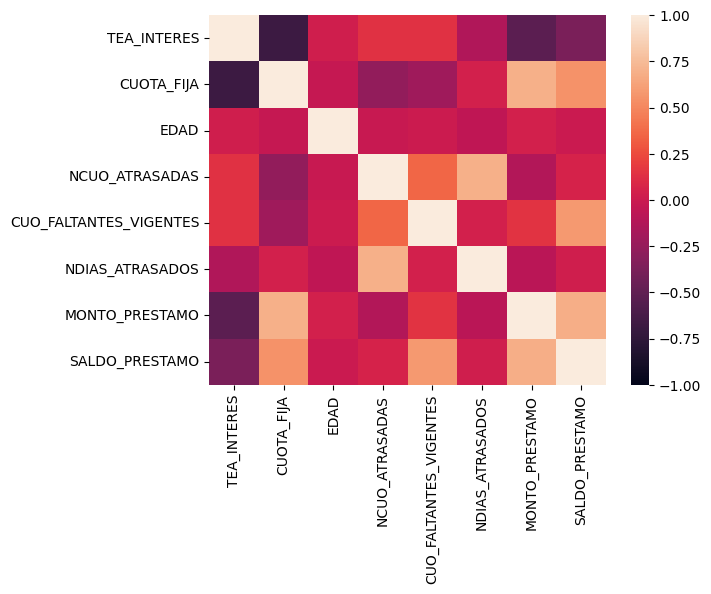

In [21]:
ax = sns.heatmap(n_data.corr(method="spearman"), vmin=-1, vmax=1);

In [22]:
def visualizar_datos(data):
     column_labels = [col.split('_')[0] for col in n_data.columns]
     return column_labels

<Axes: >

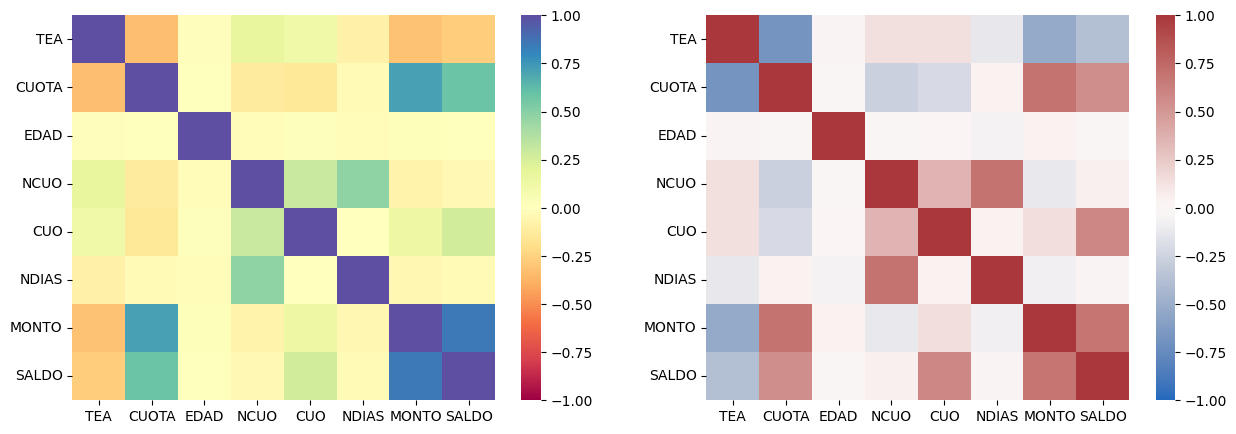

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
column_labels = [col.split('_')[0] for col in n_data.columns]
sns.heatmap(n_data.corr(method="pearson"), vmin=-1, vmax=1, cmap="Spectral", ax=axs[0],xticklabels=column_labels, yticklabels=column_labels)
sns.heatmap(n_data.corr(method="spearman"), vmin=-1, vmax=1, cmap="vlag", ax=axs[1],xticklabels=column_labels, yticklabels=column_labels)

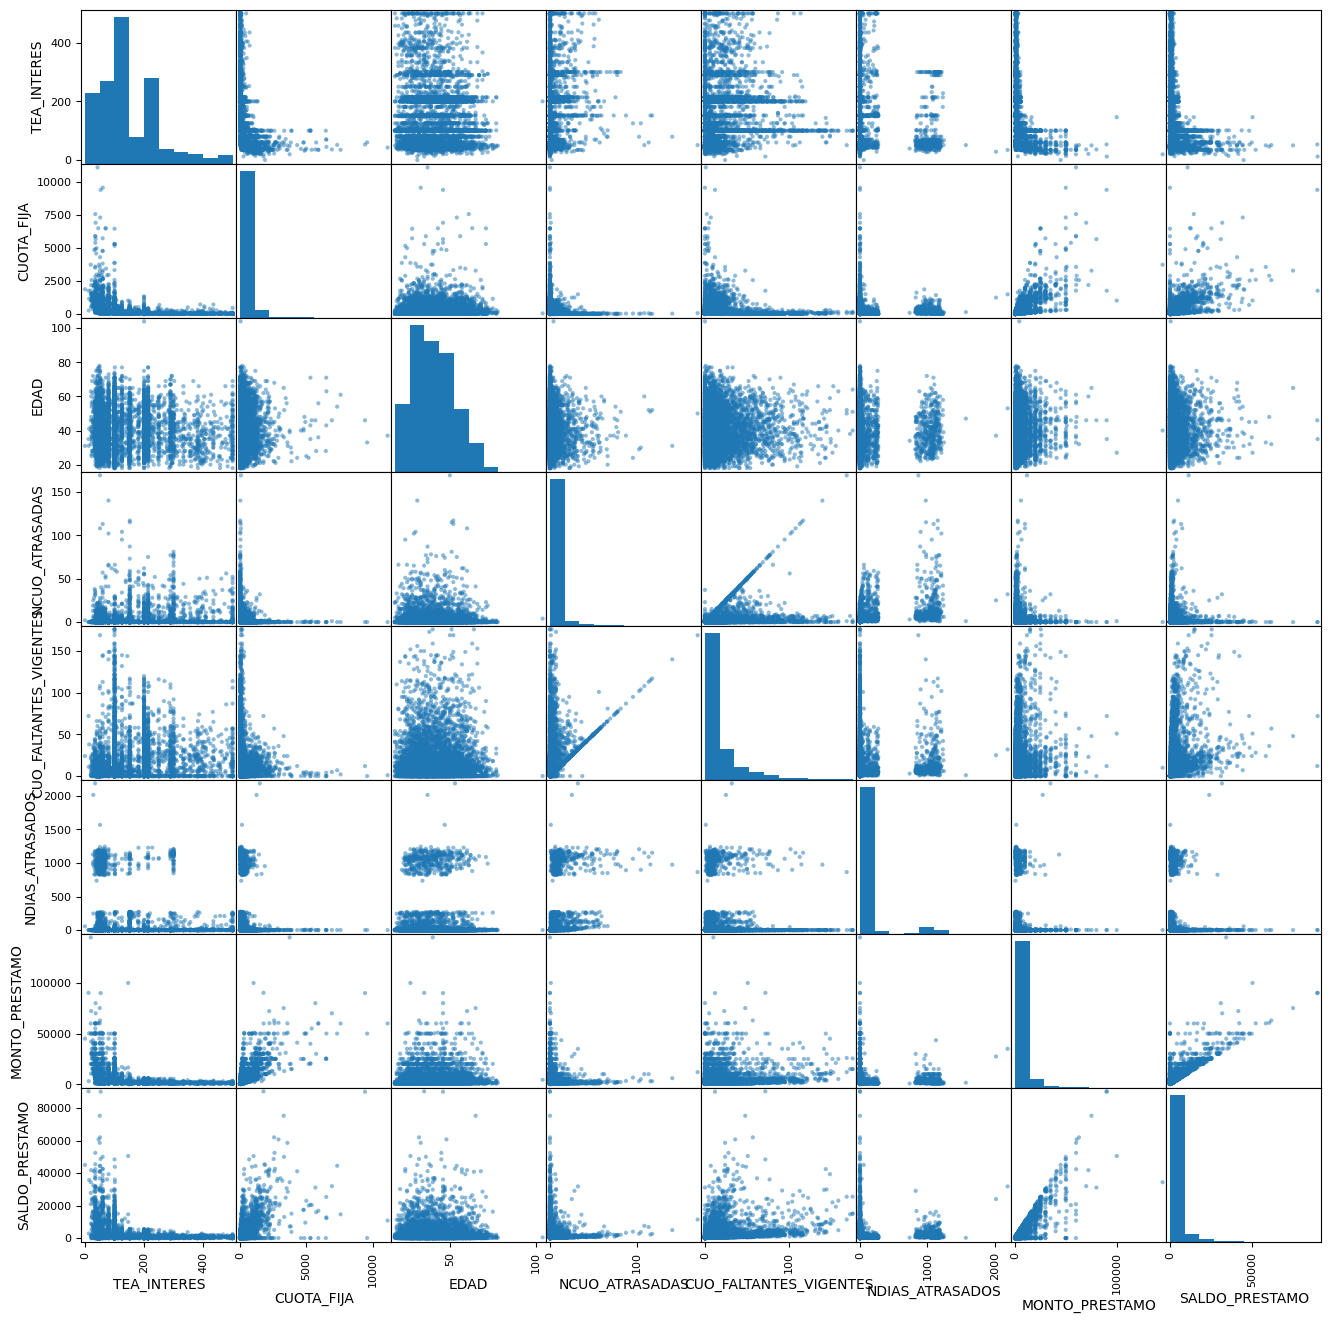

In [24]:
pd.plotting.scatter_matrix(n_data, figsize=(16,16),diagonal ="hist");

### CUOTAS ATRASADAS X TEA INTERES

In [25]:
n_data['NCUO_ATRASADAS'].corr(n_data['TEA_INTERES'], method="pearson")

0.1722701084093614

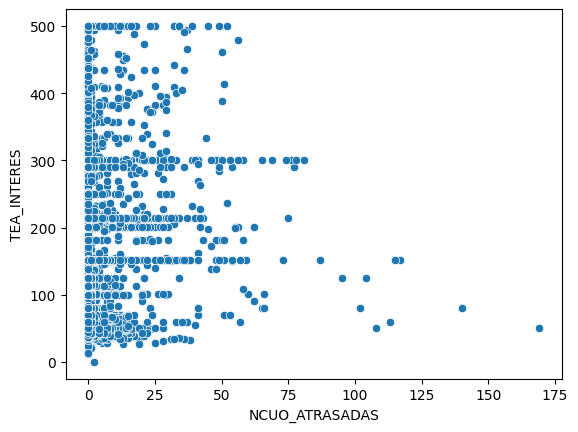

In [26]:
ax = sns.scatterplot(data=n_data, x='NCUO_ATRASADAS', y='TEA_INTERES');

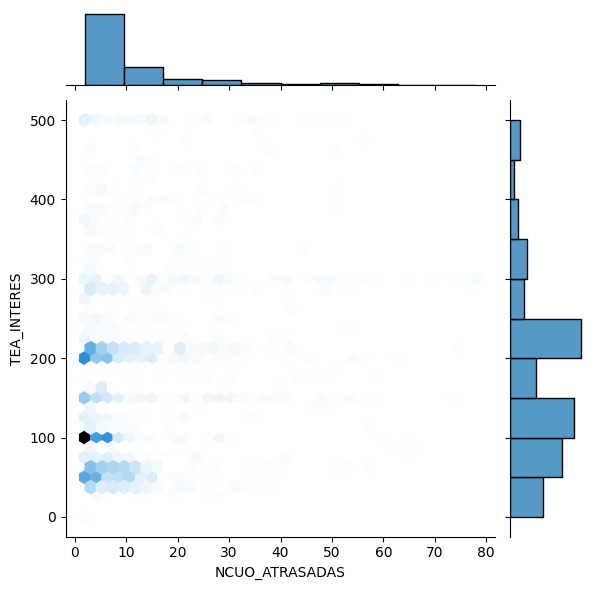

In [27]:
data_1 = n_data.query('NCUO_ATRASADAS > 1 & NCUO_ATRASADAS <= 80')
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_1['NCUO_ATRASADAS'], y=data_1['TEA_INTERES'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

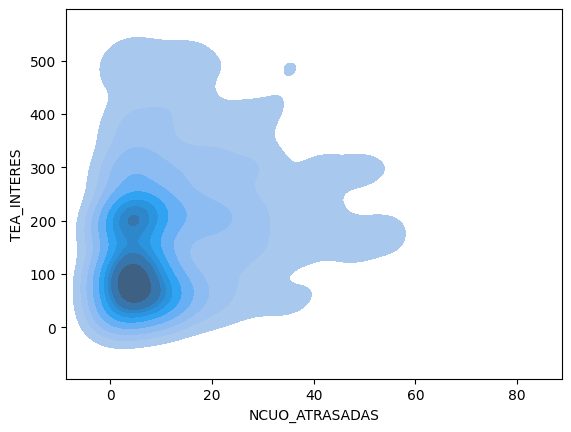

In [28]:
ax = sns.kdeplot(x=data_1['NCUO_ATRASADAS'], y=data_1['TEA_INTERES'], fill=True)

### CUOTA_FIJA X MONTO DE PRESTAMO

In [29]:
n_data['CUOTA_FIJA'].corr(n_data['MONTO_PRESTAMO'], method="pearson")

0.7136230926044994

Text(0.5, 1.0, 'Correlación Logarítmica')

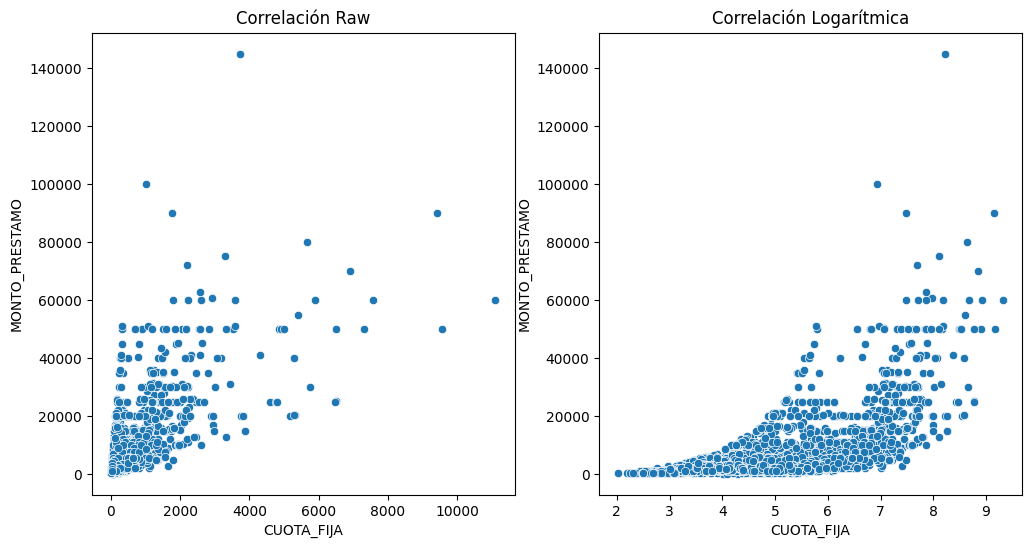

In [30]:
f, axs = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data=n_data, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[0])
axs[0].set_title("Correlación Raw")
sns.scatterplot(data=n_data, x=np.log(n_data['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[1])
axs[1].set_title("Correlación Logarítmica")

In [31]:
data_2 = n_data.query('MONTO_PRESTAMO < 10000')

Text(0.5, 1.0, 'Correlación Logarítmica')

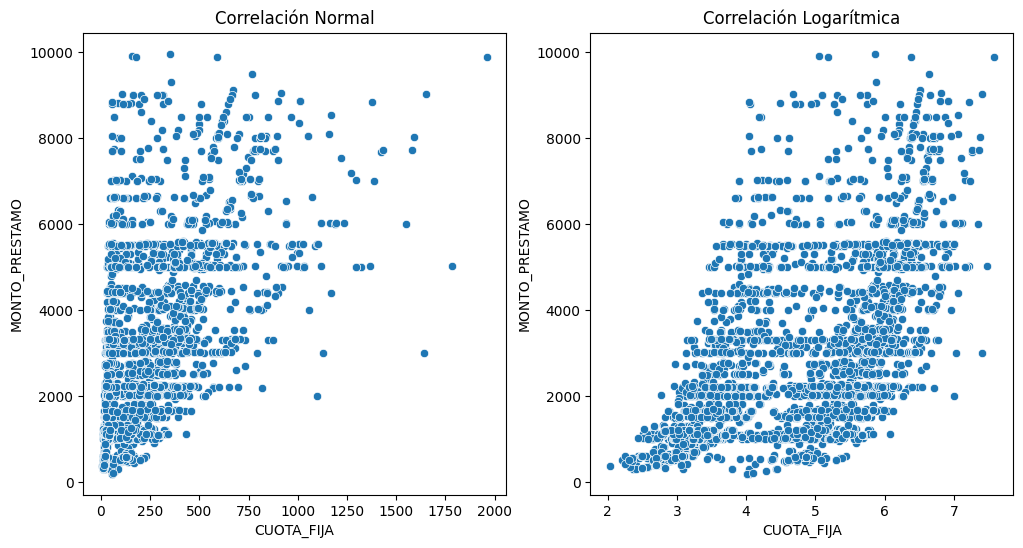

In [32]:
f, axs = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data=data_2, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=axs[0])
axs[0].set_title("Correlación Normal")
sns.scatterplot(data=data_2, x=np.log(n_data['CUOTA_FIJA']), y='MONTO_PRESTAMO', ax=axs[1])
axs[1].set_title("Correlación Logarítmica")

In [33]:
data_2.loc[(data_2['MONTO_PRESTAMO'] > 8000) & (data_2['CUOTA_FIJA'] < 250)]

TEA_INTERES  CUOTA_FIJA  EDAD  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
1446       126.36       68.00    48               1                      86   
1609       125.22      150.97    45               0                       0   
1616       100.08       66.10    44               5                     116   
1872       101.22      202.09    31               1                      59   
1958       126.49       89.01    50               0                      82   
2008       112.91      157.37    45               3                      52   
4289        51.11      203.97    43               2                      36   
4460       100.08       56.99    24               7                       0   
4782        42.58      195.04    37               0                       0   
4993        60.10       57.90    48               0                      51   
5106       125.22      119.05    36               0                       0   
5475       100.08      139.36    29               3                      38   
5527       100.08      177.87    56               4                      35   
5650       100.08      110.82    59               3                      72   
5926       101.22      164.12    33               0                       0   
6141       100.08      163.48    33               2                      53   
7807        50.93       56.96    55              14                      37   
7977       151.82      108.32    47               0                       0   
9589       100.08      218.67    61               0                      57   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
1446                0          8500.0         5358.95  
1609                0          8820.0            0.00  
1616                0          8500.0         6633.74  
1872                3          8615.0         8293.70  
1958                0          8830.0         7149.12  
2008                0          9920.0         8206.95  
4289                7          9000.0         6634.08  
4460                0          8045.0         6340.85  
4782                0          8800.0            0.00  
4993                0          8800.0         2964.60  
5106                0          8800.0            0.00  
5475                0          8800.0         5309.59  
5527                0          9900.0         6313.08  
5650                0          8800.0         7490.56  
5926                0          9015.0            0.00  
6141                0          9015.0         8611.42  
7807                0          8845.0         2914.05  
7977                0          9025.0            0.00  
9589                0          8905.0         8710.42

In [34]:
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_2['CUOTA_FIJA'], y=data_2['MONTO_PRESTAMO'], 
                   kind="hex", # Para obtener un mapa hexagonal
                   marginal_kws=dict(bins=10), # Número de bins
                  )

### SALDO PRESTADO X CUOTA FIJA

In [35]:
n_data['SALDO_PRESTAMO'].corr(n_data['CUOTA_FIJA'])

0.5836473571946241

In [36]:
f, axs = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data=n_data, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[0])
sns.regplot(data=n_data, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=axs[0], color="red",scatter=False)
axs[0].set_title("Correlación Normal")
sns.scatterplot(data=n_data, x=np.log(n_data['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[1])
sns.regplot(data=n_data, x=np.log(n_data['CUOTA_FIJA']), y='SALDO_PRESTAMO', ax=axs[1], color="red",scatter=False)
axs[1].set_title("Correlación Logarítmica")

Text(0.5, 1.0, 'Correlación Logarítmica')

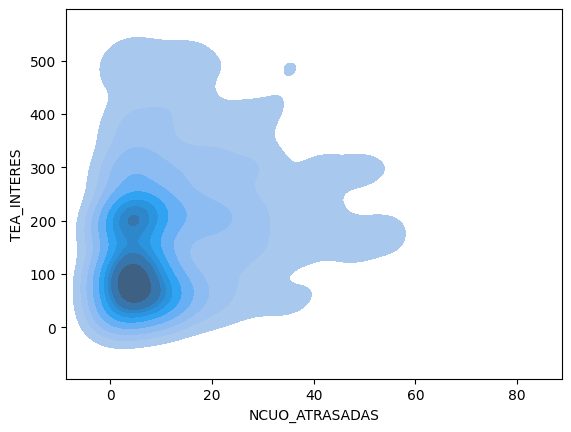

In [37]:
ax = sns.kdeplot(x=data_1['NCUO_ATRASADAS'], y=data_1['TEA_INTERES'], fill=True)

### SALDO PRESTAMO X MONTO PRESTAMO

In [38]:
n_data['SALDO_PRESTAMO'].corr(n_data['MONTO_PRESTAMO'],method="spearman")

0.6799801078702301

In [39]:
data_3 = n_data.query('SALDO_PRESTAMO > 0')

In [40]:
f, axs = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data=n_data, x='SALDO_PRESTAMO', y='MONTO_PRESTAMO', ax=axs[0])
axs[0].set_title("Correlación Normal")
sns.scatterplot(data=n_data, x=np.log(n_data['SALDO_PRESTAMO']), y='MONTO_PRESTAMO', ax=axs[1])
axs[1].set_title("Correlación Logarítmica")

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Correlación Logarítmica')

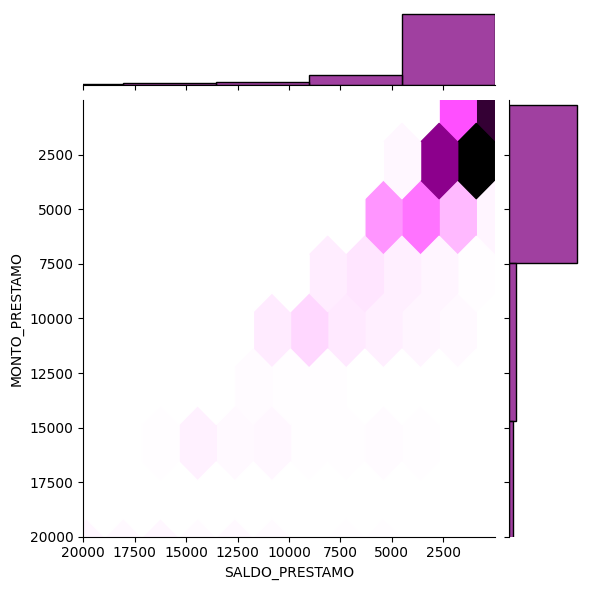

In [41]:
# Mapa hexagonal sobre el dataframe filtrado
ax = sns.jointplot(x=data_3['SALDO_PRESTAMO'], y=data_3['MONTO_PRESTAMO'], 
                   kind="hex", color="purple", xlim=20000,ylim=20000,
                   marginal_kws=dict(bins=20)
                  )

(0.0, 30000.0)

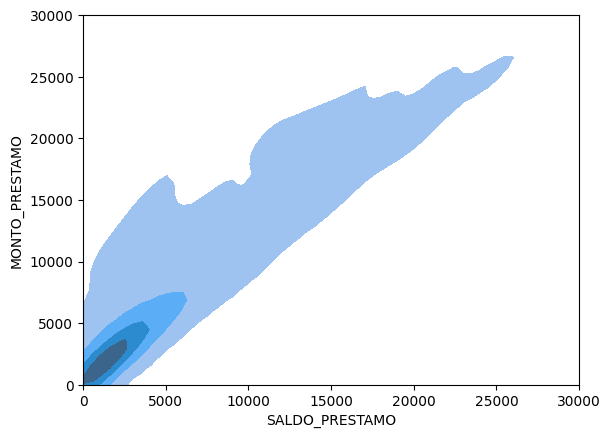

In [42]:
ax = sns.kdeplot(x=data_3['SALDO_PRESTAMO'], y=data_3['MONTO_PRESTAMO'], fill=True, levels = 5)
ax.set_ylim(0,30000)
ax.set_xlim(0,30000)

### CUOTAS FALTANTES VIGENTES X CUOTAS ATRASADAS

In [43]:
data_4 = n_data.query('CUO_FALTANTES_VIGENTES > 0')

In [44]:
data_4['CUO_FALTANTES_VIGENTES'].corr(data_4['NCUO_ATRASADAS'],method="spearman")

0.2160091397258558

In [45]:
data_4.nunique()

TEA_INTERES                571
CUOTA_FIJA                4227
EDAD                        61
NCUO_ATRASADAS              81
CUO_FALTANTES_VIGENTES     144
NDIAS_ATRASADOS            441
MONTO_PRESTAMO             810
SALDO_PRESTAMO            4371
dtype: int64

c:\Users\LAPTOP\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'Correlación Logarítmica')

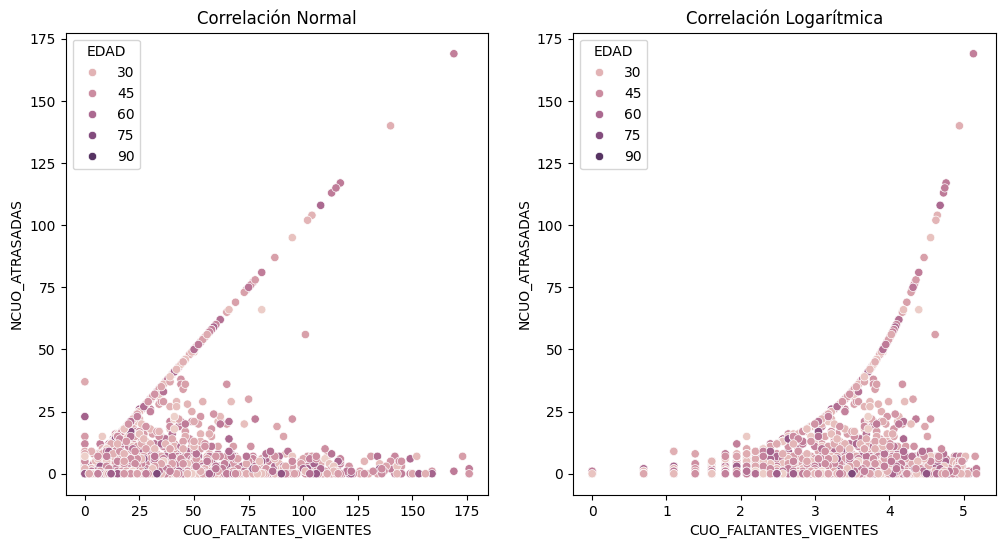

In [46]:
f, axs = plt.subplots(1,2,figsize = (12,6))
sns.scatterplot(data=n_data, x='CUO_FALTANTES_VIGENTES', y='NCUO_ATRASADAS', ax=axs[0], hue='EDAD')
axs[0].set_title("Correlación Normal")
sns.scatterplot(data=n_data, x=np.log(n_data['CUO_FALTANTES_VIGENTES']), y='NCUO_ATRASADAS', ax=axs[1], hue='EDAD')
axs[1].set_title("Correlación Logarítmica")

(-5.0, 150.0)

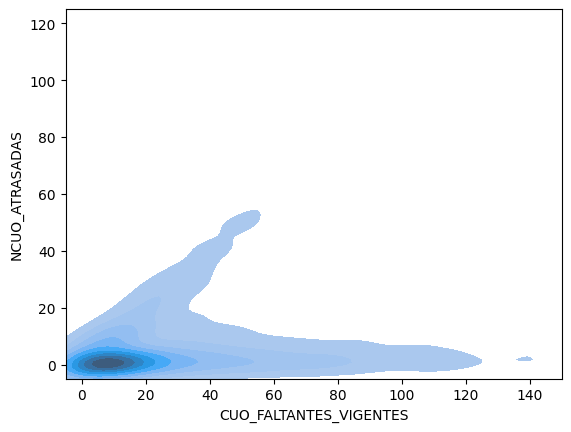

In [47]:
ax = sns.kdeplot(x=data_4['CUO_FALTANTES_VIGENTES'], y=data_4['NCUO_ATRASADAS'], fill=True)
ax.set_ylim(-5,125)
ax.set_xlim(-5,150)

### EDAD X SALDO PRESTADO

In [123]:
n_data['EDAD'].corr(n_data['MONTO_PRESTAMO'])

0.03019827701821323

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

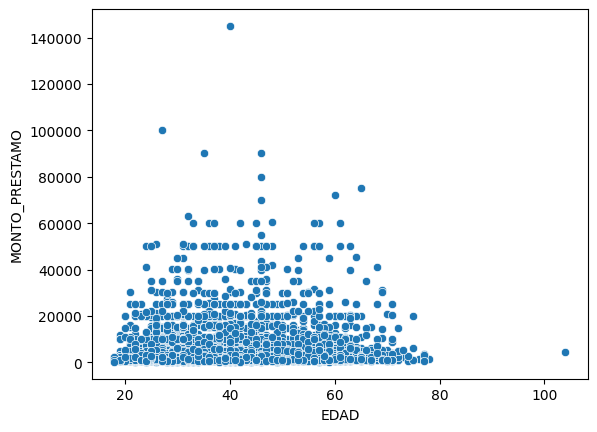

In [126]:
sns.scatterplot(data=n_data, x='EDAD', y='MONTO_PRESTAMO')

In [124]:
n_data['EDAD'].corr(np.log(n_data['MONTO_PRESTAMO']))


0.042400974099069684

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

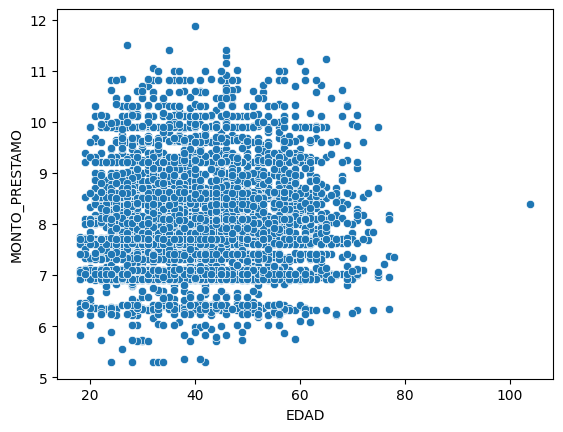

In [129]:
sns.scatterplot(data=n_data, x='EDAD', y = np.log(data['MONTO_PRESTAMO']) )

### CUOTAS ATRASADAS X TEA ANUAL

In [131]:
n_data.nunique()

TEA_INTERES                668
CUOTA_FIJA                5079
EDAD                        62
NCUO_ATRASADAS              81
CUO_FALTANTES_VIGENTES     145
NDIAS_ATRASADOS            441
MONTO_PRESTAMO             891
SALDO_PRESTAMO            4590
dtype: int64

<Axes: xlabel='NCUO_ATRASADAS', ylabel='TEA_INTERES'>

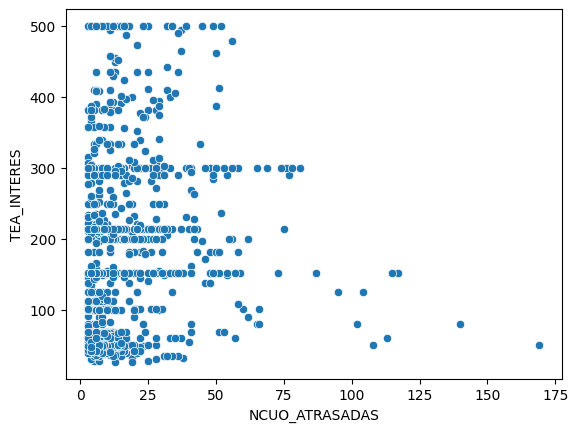

In [140]:
sns.scatterplot(data=n_data.query('NCUO_ATRASADAS > 2'),x='NCUO_ATRASADAS', y=data['TEA_INTERES'])

<Axes: xlabel='NCUO_ATRASADAS', ylabel='TEA_INTERES'>

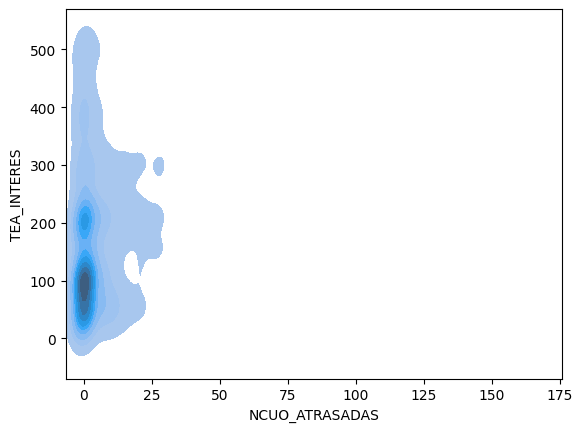

In [143]:
sns.kdeplot(x=n_data['NCUO_ATRASADAS'], y=n_data['TEA_INTERES'], fill=True)

## DATOS SEMANALES

In [48]:
data_Frec2= data.query('NOM_FRECUENCIA == "SEMANAS"')

In [49]:
# pd.set_option('display.max_columns', None)
data_no_repro2 = data_Frec2.query('NRO_REPRO.isna()')

In [50]:
data_no_repro.sample(7)

SOCIO  CUENTA  AGENCIA  TIPO_SOCIO MONEDA  \
6004            QUISPE QUISPE, MALIONOD   28852        4           1      S   
1371                MORA HERRERA, DAVID    2101        1           1      S   
9460            MARTINEZ VARA, ETELBINA   29024        1           1      S   
3165  GONZALES CASTAÑEDA, KENJI TADASHI   28189        2           1      S   
1893             QUISPE AMACHE, JUSTINA   24238        1           1      S   
5960     HUALLPARTUPA ROQUE, WASHINGTON   19733        4           1      S   
6536               MAMANI MAMANI, FLORA   23904        1           1      S   

              PAGARE          PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
6004  04-0003461-24     CONSUMO FORMAL   2024-04-22        80.00      322.58   
1371  01-0025994-24             PYME 1   2024-04-29       101.22      233.27   
9460  07-0027004-24      MAS INCLUSIVO   2024-04-29       213.84       21.87   
3165  02-0009928-24             PYME 1   2024-04-29       100.08      435.30   
1893  01-0026778-24   PAGA DIARIO (CT)   2024-04-30       100.08       14.19   
5960  04-0003407-24      MAS INCLUSIVO   2024-04-30       249.85       25.91   
6536  04-002662-23        RAPIDIN (CT)   2024-04-22        49.19      109.67   

      DIAS NOM_FRECUENCIA  EDAD ESTADO_CIVIL SEXO TIPO_VIVIENDA      OTORGA  \
6004    30          MESES    31  Soltero (a)    F     ALQUILADA  2024-03-27   
1371    30          MESES    52  Soltero (a)    M        PROPIA  2024-01-08   
9460     1          DIAS     46  Soltero (a)    F      FAMILIAR  2024-04-05   
3165    30          MESES    26  Soltero (a)    M     ALQUILADA  2024-03-27   
1893     1          DIAS     32  Soltero (a)    F      FAMILIAR  2024-03-25   
5960     1          DIAS     24  Soltero (a)    M      FAMILIAR  2024-03-18   
6536    30          MESES    35  Soltero (a)    F     ALQUILADA  2023-09-20   

     RIESGO_INDIVIDUAL  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
6004            NORMAL               0                       5   
1371            NORMAL               0                       7   
9460            NORMAL               0                       0   
3165            NORMAL               0                      11   
1893            NORMAL               2                      61   
5960            NORMAL               0                      68   
6536            NORMAL               0                       5   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  \
6004                0          1630.0         1390.15        NaN   
1371                0          1700.0         1296.27        NaN   
9460                0           610.0            0.00        NaN   
3165                0          3630.0         3412.68        NaN   
1893                0          1125.0          873.28        NaN   
5960                0          2025.0         1536.68        NaN   
6536                0          1060.0          495.23        NaN   

                               ANA_ORIGEN  \
6004                  QUISPE QUISPE, YENI   
1371     VILLALBA CUSITTITO, VIANA MAZIEL   
9460     BERNARDO CRISPIN, LUCIA MILAGROS   
3165        FARFAN VARGAS, DANNA FERNANDA   
1893  APARICIO HUILLCA, SHIRLEY KATHERINE   
5960                  QUISPE QUISPE, YENI   
6536                  CCOPA TINTAYA, LUIS   

                               ANA_ACTUAL        PROFESION      OCUPACION  \
6004                  QUISPE QUISPE, YENI          Docente      PROMOTORA   
1371     VILLALBA CUSITTITO, VIANA MAZIEL      Comerciante    COMERCIANTE   
9460     BERNARDO CRISPIN, LUCIA MILAGROS      Comerciante  VENTA DE ROPA   
3165        FARFAN VARGAS, DANNA FERNANDA         No Tiene      CONDUCTOR   
1893  APARICIO HUILLCA, SHIRLEY KATHERINE      Comerciante    COMERCIANTE   
5960                  QUISPE QUISPE, YENI           obrero   PEON DE OBRA   
6536             MARTINEZ CCANSAYA, TANIA  No Especificada   SALCHIPAPAS    

                                 ACTIVIDAD_ECO  
6004                      

In [51]:
n_data2 = data_no_repro.select_dtypes(include=[np.number])

In [52]:
n_data2 = n_data2.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS'], axis=1)

In [53]:
n_data2.drop('NRO_REPRO',axis=1,inplace=True)

In [54]:
n_data2.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  5911.000000   5911.000000  5911.000000     5911.000000   
mean    138.684260    329.484613    40.499070        3.295043   
std      98.823549    591.384425    11.899194        9.300760   
min       0.000000      7.610000    18.000000        0.000000   
25%      67.460000     41.465000    31.000000        0.000000   
50%     100.080000    153.800000    39.000000        0.000000   
75%     200.090000    365.990000    49.000000        2.000000   
max     500.000000  11106.870000   104.000000      169.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count             5911.000000      5911.000000     5911.000000     5911.000000  
mean                17.491795        84.758078     4964.547119     3039.119110  
std                 24.317003       269.608238     7892.256047     5695.614171  
min                  0.000000         0.000000      200.000000        0.000000  
25%                  3.000000         0.000000     1135.000000      477.050000  
50%                  9.000000         0.000000     2225.000000     1234.330000  
75%                 21.000000         0.000000     5060.000000     3051.155000  
max                176.000000      2187.000000   145000.000000    90240.000000

In [55]:
n_data2.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.685112  0.029854        0.140272   
CUOTA_FIJA                -0.685112    1.000000 -0.026801       -0.267906   
EDAD                       0.029854   -0.026801  1.000000       -0.019692   
NCUO_ATRASADAS             0.140272   -0.267906 -0.019692        1.000000   
CUO_FALTANTES_VIGENTES     0.136284   -0.205698  0.006258        0.358843   
NDIAS_ATRASADOS           -0.126627    0.042886 -0.058123        0.688282   
MONTO_PRESTAMO            -0.526428    0.692722  0.042512       -0.122327   
SALDO_PRESTAMO            -0.382697    0.548684 -0.002873        0.058101   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.136284        -0.126627   
CUOTA_FIJA                           -0.205698         0.042886   
EDAD                                  0.006258        -0.058123   
NCUO_ATRASADAS                        0.358843         0.688282   
CUO_FALTANTES_VIGENTES                1.000000         0.043595   
NDIAS_ATRASADOS                       0.043595         1.000000   
MONTO_PRESTAMO                        0.145946        -0.080227   
SALDO_PRESTAMO                        0.579619         0.029384   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.526428       -0.382697  
CUOTA_FIJA                    0.692722        0.548684  
EDAD                          0.042512       -0.002873  
NCUO_ATRASADAS               -0.122327        0.058101  
CUO_FALTANTES_VIGENTES        0.145946        0.579619  
NDIAS_ATRASADOS              -0.080227        0.029384  
MONTO_PRESTAMO                1.000000        0.679980  
SALDO_PRESTAMO                0.679980        1.000000

In [56]:
ax = sns.heatmap(n_data2.corr(), vmin=-1, vmax=1, annot=True);

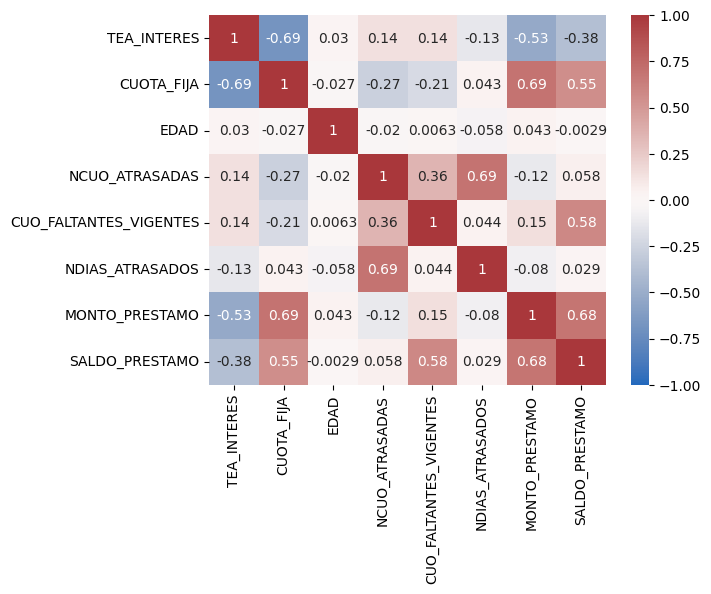

In [57]:
ax = sns.heatmap(n_data2.corr(method="spearman"), vmin=-1, vmax=1, cmap="vlag", annot=True);

## DATOS QUINCENALES

In [58]:
data_Frec1= data.query('NOM_FRECUENCIA == "QUINCENAS"')

In [59]:
pd.set_option('display.max_columns', None)
data_no_repro3 = data_Frec1.query('NRO_REPRO.isna()')

In [60]:
n_data1 = data_no_repro3.select_dtypes(include=[np.number])

In [61]:
n_data1 = n_data1.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS','NRO_REPRO'], axis=1)

In [62]:
n_data1.describe()

TEA_INTERES  CUOTA_FIJA       EDAD  NCUO_ATRASADAS  \
count    52.000000   52.000000  52.000000       52.000000   
mean    109.303846  171.450000  37.269231        2.346154   
std      49.036493  157.975205  10.462099        4.329038   
min      42.910000   49.730000  22.000000        0.000000   
25%      54.205000   76.967500  29.000000        0.000000   
50%     149.870000  110.125000  35.500000        0.000000   
75%     149.870000  209.250000  42.000000        1.000000   
max     213.840000  833.990000  70.000000       19.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count               52.000000        52.000000       52.000000       52.000000  
mean                 5.269231       192.826923     1822.562308      784.040385  
std                  5.228562       409.726055     2023.374436      980.420933  
min                  0.000000         0.000000      200.000000        0.000000  
25%                  1.000000         0.000000      487.500000      153.340000  
50%                  4.000000         0.000000     1000.000000      400.835000  
75%                  8.500000        15.750000     2233.750000      942.920000  
max                 21.000000      1238.000000     8050.000000     4755.320000

In [63]:
n_data1.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.544903 -0.275043       -0.338276   
CUOTA_FIJA                -0.544903    1.000000  0.242336        0.189647   
EDAD                      -0.275043    0.242336  1.000000        0.139538   
NCUO_ATRASADAS            -0.338276    0.189647  0.139538        1.000000   
CUO_FALTANTES_VIGENTES    -0.132684    0.068564 -0.012118        0.411144   
NDIAS_ATRASADOS           -0.374437    0.313395  0.163820        0.900327   
MONTO_PRESTAMO            -0.784525    0.879695  0.234172        0.224564   
SALDO_PRESTAMO            -0.306843    0.421727  0.054009        0.517037   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                          -0.132684        -0.374437   
CUOTA_FIJA                            0.068564         0.313395   
EDAD                                 -0.012118         0.163820   
NCUO_ATRASADAS                        0.411144         0.900327   
CUO_FALTANTES_VIGENTES                1.000000         0.481061   
NDIAS_ATRASADOS                       0.481061         1.000000   
MONTO_PRESTAMO                        0.249413         0.350443   
SALDO_PRESTAMO                        0.863205         0.558322   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.784525       -0.306843  
CUOTA_FIJA                    0.879695        0.421727  
EDAD                          0.234172        0.054009  
NCUO_ATRASADAS                0.224564        0.517037  
CUO_FALTANTES_VIGENTES        0.249413        0.863205  
NDIAS_ATRASADOS               0.350443        0.558322  
MONTO_PRESTAMO                1.000000        0.491661  
SALDO_PRESTAMO                0.491661        1.000000

In [64]:
sns.heatmap(n_data.corr(method="pearson"), vmin=-1, vmax=1, cmap="Spectral", ax=axs[0],)

<Axes: title={'center': 'Correlación Normal'}>

In [65]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
column_labels = visualizar_datos(n_data1)
ax = sns.heatmap(n_data1.corr(method="pearson"), vmin=-1, vmax=1,ax=axs[0,0], cmap="coolwarm",  xticklabels=column_labels, yticklabels=column_labels, annot=True);
axs[0,0].set_title('Mapa de correlacion de Pearson')
ax = sns.heatmap(n_data1.corr(method="kendall"), vmin=-1, vmax=1,ax=axs[0,1], cmap="vlag",  xticklabels=column_labels, yticklabels=column_labels, annot= True);
axs[0,1].set_title('Mapa de correlacion de Kendall')
ax = sns.heatmap(n_data1.corr(method="spearman"), vmin=-1, vmax=1,ax=axs[1,0], cmap="Spectral",xticklabels=column_labels, yticklabels=column_labels, annot=True);
axs[1,0].set_title('Mapa de correlacion de Spearman')

Text(0.5, 1.0, 'Mapa de correlacion de Spearman')

In [66]:
n_data1.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.544903 -0.275043       -0.338276   
CUOTA_FIJA                -0.544903    1.000000  0.242336        0.189647   
EDAD                      -0.275043    0.242336  1.000000        0.139538   
NCUO_ATRASADAS            -0.338276    0.189647  0.139538        1.000000   
CUO_FALTANTES_VIGENTES    -0.132684    0.068564 -0.012118        0.411144   
NDIAS_ATRASADOS           -0.374437    0.313395  0.163820        0.900327   
MONTO_PRESTAMO            -0.784525    0.879695  0.234172        0.224564   
SALDO_PRESTAMO            -0.306843    0.421727  0.054009        0.517037   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                          -0.132684        -0.374437   
CUOTA_FIJA                            0.068564         0.313395   
EDAD                                 -0.012118         0.163820   
NCUO_ATRASADAS                        0.411144         0.900327   
CUO_FALTANTES_VIGENTES                1.000000         0.481061   
NDIAS_ATRASADOS                       0.481061         1.000000   
MONTO_PRESTAMO                        0.249413         0.350443   
SALDO_PRESTAMO                        0.863205         0.558322   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.784525       -0.306843  
CUOTA_FIJA                    0.879695        0.421727  
EDAD                          0.234172        0.054009  
NCUO_ATRASADAS                0.224564        0.517037  
CUO_FALTANTES_VIGENTES        0.249413        0.863205  
NDIAS_ATRASADOS               0.350443        0.558322  
MONTO_PRESTAMO                1.000000        0.491661  
SALDO_PRESTAMO                0.491661        1.000000

In [67]:
n_data1['MONTO_PRESTAMO'].corr(n_data1['EDAD'])

0.27381696797372784

<Axes: xlabel='EDAD', ylabel='MONTO_PRESTAMO'>

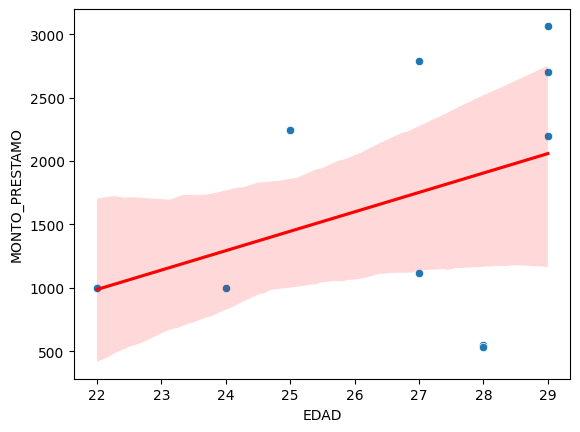

In [68]:
tax_filt = n_data1.loc[(n_data1['EDAD'] <= 30) &
                   (n_data1['EDAD'] >= 18) &
                   (n_data1['MONTO_PRESTAMO'] >= 500) &
                   (n_data1['MONTO_PRESTAMO'] <= 20000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='EDAD', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='EDAD', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

In [69]:
ax = sns.kdeplot(x=n_data1.query('EDAD >= 18 and EDAD <= 30')['EDAD'], y=n_data1['MONTO_PRESTAMO'], fill=True, levels =7)
ax.set_ylim(0, 20000)

(0.0, 20000.0)

In [70]:
ax = sns.scatterplot(data=n_data1, x='CUOTA_FIJA', y='MONTO_PRESTAMO')

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

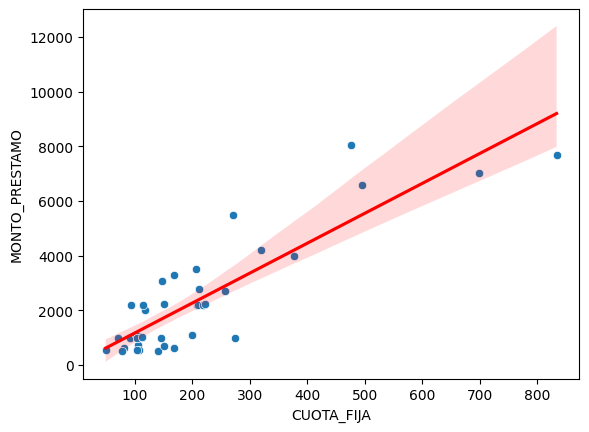

In [71]:
tax_filt = n_data1.loc[(n_data1['CUOTA_FIJA'] <= 2000) &
                   (n_data1['CUOTA_FIJA'] >= 20) &
                   (n_data1['MONTO_PRESTAMO'] >= 500) &
                   (n_data1['MONTO_PRESTAMO'] <= 10000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

## DATOS MENSUALES

In [72]:
data_Frec3= data.query('NOM_FRECUENCIA == "MESES"')

In [73]:
pd.set_option('display.max_columns', None)
data_no_repro3 = data_Frec3.query('NRO_REPRO.isna()')

In [74]:
n_data3 = data_no_repro3.select_dtypes(include=[np.number])

In [75]:
n_data3 = n_data3.drop(['CUENTA', 'AGENCIA', 'TIPO_SOCIO', 'DIAS','NRO_REPRO'], axis=1)

In [76]:
n_data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2310 entries, 0 to 9659
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TEA_INTERES             2310 non-null   float64
 1   CUOTA_FIJA              2310 non-null   float64
 2   EDAD                    2310 non-null   int64  
 3   NCUO_ATRASADAS          2310 non-null   int64  
 4   CUO_FALTANTES_VIGENTES  2310 non-null   int64  
 5   NDIAS_ATRASADOS         2310 non-null   int64  
 6   MONTO_PRESTAMO          2310 non-null   float64
 7   SALDO_PRESTAMO          2310 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 162.4 KB


In [77]:
n_data3.describe()

TEA_INTERES    CUOTA_FIJA         EDAD  NCUO_ATRASADAS  \
count  2310.000000   2310.000000  2310.000000     2310.000000   
mean     68.625078    625.322550    39.432468        1.371861   
std      31.087251    759.669431    12.216556        3.448286   
min       0.000000     19.000000    18.000000        0.000000   
25%      45.760000    230.695000    30.000000        0.000000   
50%      56.450000    388.440000    38.000000        0.000000   
75%     100.080000    738.442500    47.000000        1.000000   
max     213.840000  11106.870000    78.000000       38.000000   

       CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  
count             2310.000000      2310.000000     2310.000000     2310.000000  
mean                 8.475758       121.439394     7029.756706     4614.086710  
std                  7.386741       317.913087    10154.321235     7412.221319  
min                  0.000000         0.000000      445.000000        0.000000  
25%                  4.000000         0.000000     1937.500000      965.640000  
50%                  7.000000         0.000000     3350.000000     2077.445000  
75%                 11.000000         6.000000     7760.000000     4905.190000  
max                 72.000000      2187.000000   145000.000000    90240.000000

In [78]:
n_data3.corr(method="spearman")

TEA_INTERES  CUOTA_FIJA      EDAD  NCUO_ATRASADAS  \
TEA_INTERES                1.000000   -0.324766 -0.080015       -0.080378   
CUOTA_FIJA                -0.324766    1.000000  0.142219       -0.193312   
EDAD                      -0.080015    0.142219  1.000000       -0.069001   
NCUO_ATRASADAS            -0.080378   -0.193312 -0.069001        1.000000   
CUO_FALTANTES_VIGENTES     0.053968    0.211024 -0.023765        0.004853   
NDIAS_ATRASADOS           -0.080930   -0.198045 -0.071989        0.976106   
MONTO_PRESTAMO            -0.509007    0.922010  0.136273       -0.176785   
SALDO_PRESTAMO            -0.179602    0.728621  0.069901       -0.089917   

                        CUO_FALTANTES_VIGENTES  NDIAS_ATRASADOS  \
TEA_INTERES                           0.053968        -0.080930   
CUOTA_FIJA                            0.211024        -0.198045   
EDAD                                 -0.023765        -0.071989   
NCUO_ATRASADAS                        0.004853         0.976106   
CUO_FALTANTES_VIGENTES                1.000000        -0.017435   
NDIAS_ATRASADOS                      -0.017435         1.000000   
MONTO_PRESTAMO                        0.360131        -0.185956   
SALDO_PRESTAMO                        0.726745        -0.108530   

                        MONTO_PRESTAMO  SALDO_PRESTAMO  
TEA_INTERES                  -0.509007       -0.179602  
CUOTA_FIJA                    0.922010        0.728621  
EDAD                          0.136273        0.069901  
NCUO_ATRASADAS               -0.176785       -0.089917  
CUO_FALTANTES_VIGENTES        0.360131        0.726745  
NDIAS_ATRASADOS              -0.185956       -0.108530  
MONTO_PRESTAMO                1.000000        0.771784  
SALDO_PRESTAMO                0.771784        1.000000

In [79]:
ax = sns.heatmap(n_data2.corr(method="spearman"), vmin=-1, vmax=1,annot=True);
ax.set_title('Mapa de correlacion de Pearson')

Text(0.5, 1.0, 'Mapa de correlacion de Pearson')

Text(0.5, 1.0, 'Mapa de correlacion de Spearman')

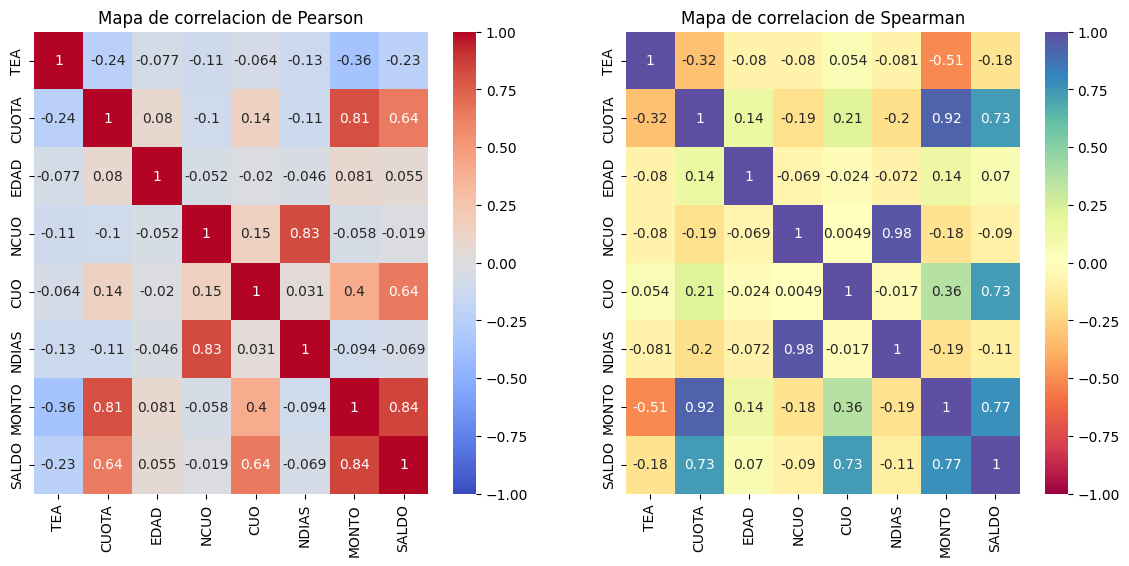

In [80]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
column_labels = visualizar_datos(n_data3)
ax = sns.heatmap(n_data3.corr(method="pearson"), vmin=-1, vmax=1, ax=axs[0], cmap="coolwarm",annot=True,xticklabels=column_labels, yticklabels=column_labels)
axs[0].set_title('Mapa de correlacion de Pearson')
ax = sns.heatmap(n_data3.corr(method="spearman"), vmin=-1, vmax=1, ax=axs[1], cmap="Spectral", annot=True,xticklabels=column_labels, yticklabels=column_labels)
axs[1].set_title('Mapa de correlacion de Spearman')

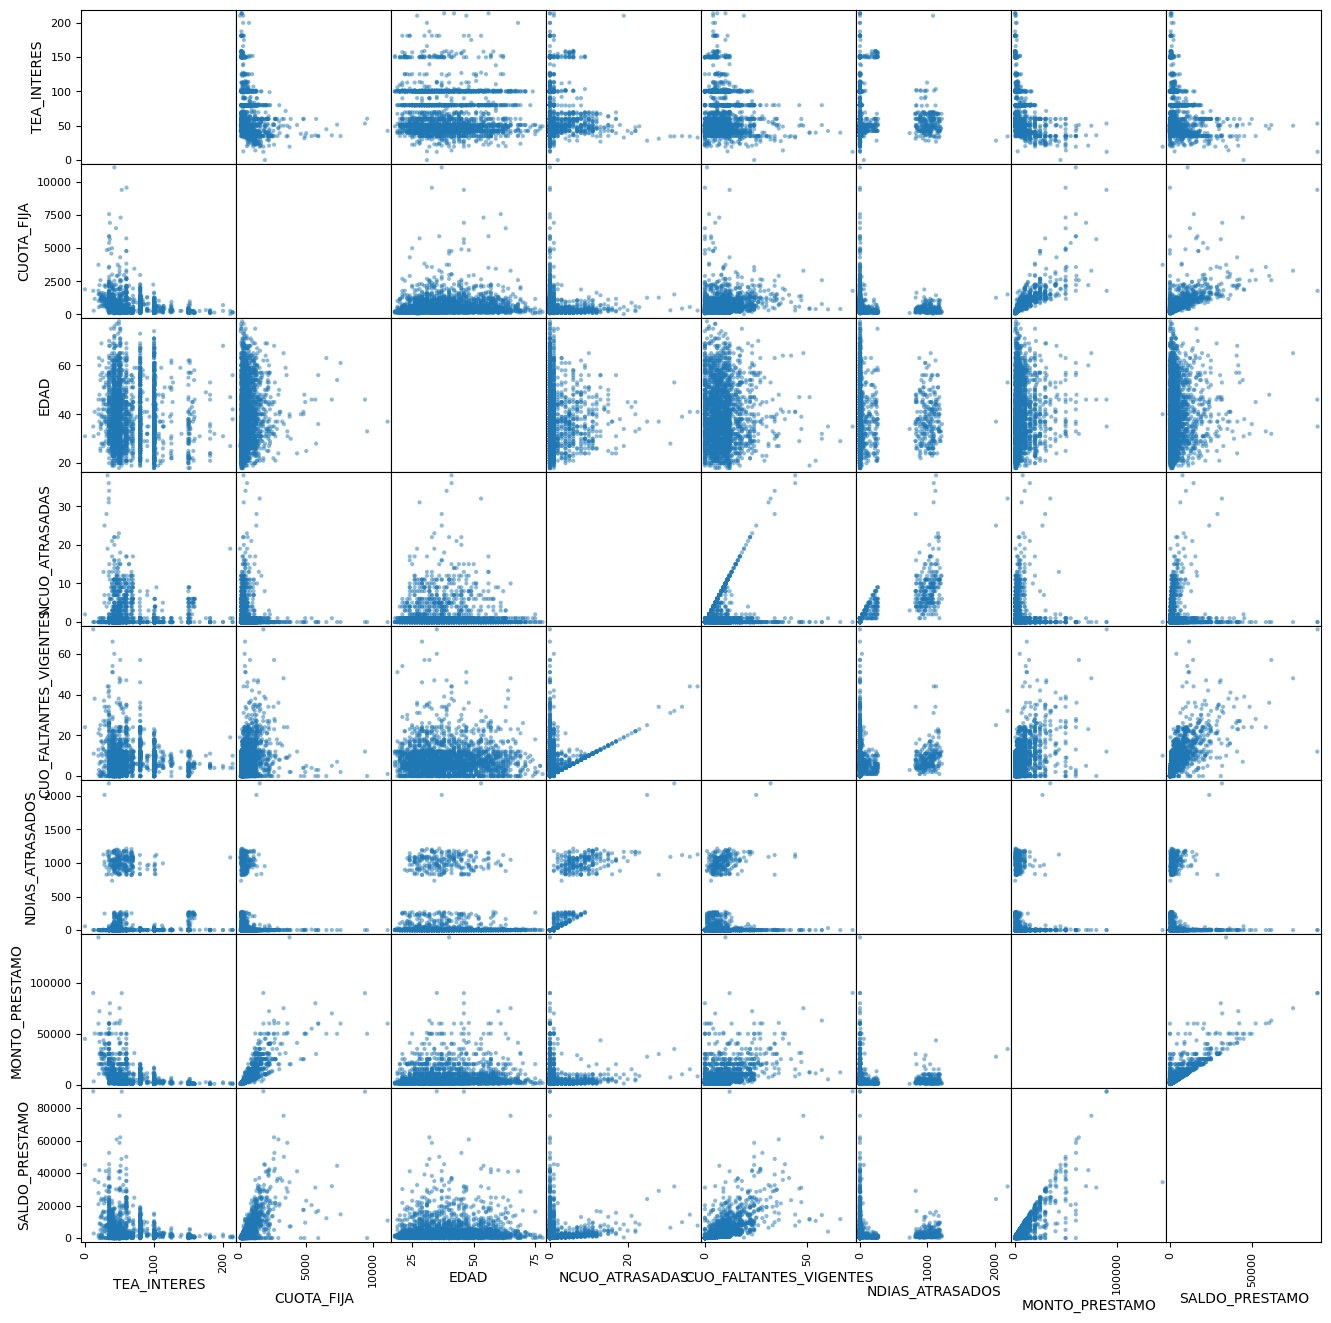

In [144]:
pd.plotting.scatter_matrix(n_data3, figsize=(16,16),diagonal ="");

### NCUO ATRASADAS X NDIAS ATRASADOS

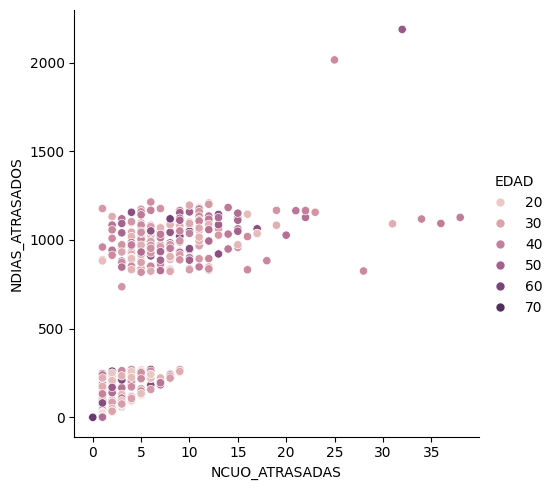

In [81]:
sns.relplot(data=n_data3, x= 'NCUO_ATRASADAS',y='NDIAS_ATRASADOS', hue ="EDAD")
#plt.yticks(np.arange(0,1000,50))

In [82]:
n_data3.nunique()

TEA_INTERES                274
CUOTA_FIJA                2212
EDAD                        61
NCUO_ATRASADAS              31
CUO_FALTANTES_VIGENTES      52
NDIAS_ATRASADOS            297
MONTO_PRESTAMO             509
SALDO_PRESTAMO            1938
dtype: int64

In [83]:
n_data3['CUOTA_FIJA'].corr(n_data3['MONTO_PRESTAMO'])

0.8101480982749709

### CUOTA FIJA X MONTO PRESTAMO

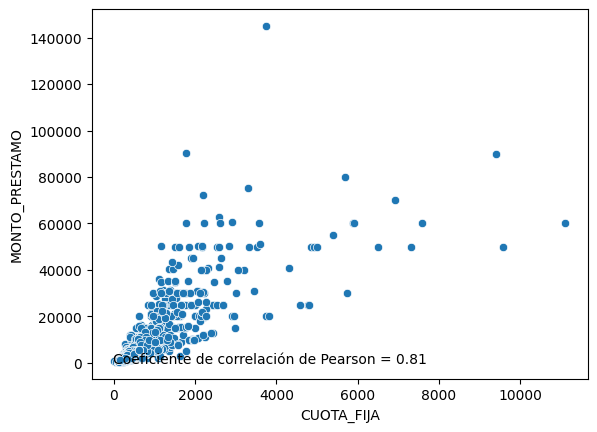

In [84]:
ax = sns.scatterplot(data=n_data3, x='CUOTA_FIJA', y='MONTO_PRESTAMO')

coef = n_data3['CUOTA_FIJA'].corr(n_data3['MONTO_PRESTAMO'])

plt.text(-17, 3.5, f'Coeficiente de correlación de Pearson = {coef:.2f}');

<Axes: xlabel='CUOTA_FIJA', ylabel='MONTO_PRESTAMO'>

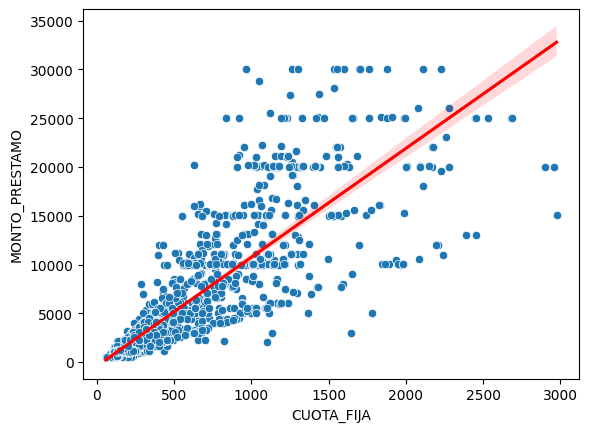

In [85]:
tax_filt = n_data3.loc[(n_data3['CUOTA_FIJA'] <= 3000) &
                   (n_data3['CUOTA_FIJA'] >= 20) &
                   (n_data3['MONTO_PRESTAMO'] >= 500) &
                   (n_data3['MONTO_PRESTAMO'] <= 30000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='MONTO_PRESTAMO', ax=ax, color="red",scatter=False)

### CUOTA FIJA VS SALDO PRESTAMO

In [86]:
n_data3['CUOTA_FIJA'].corr(n_data3['SALDO_PRESTAMO'])

0.6368928722138862

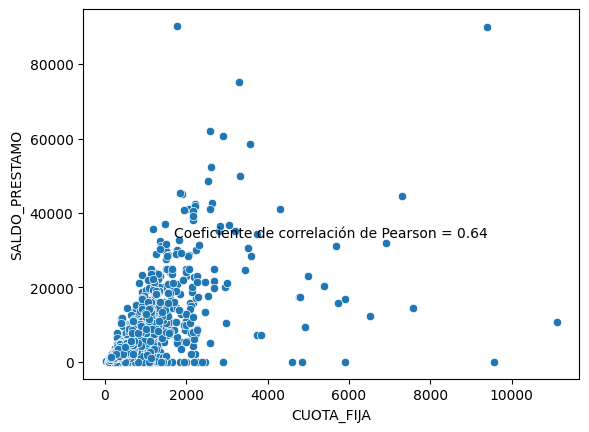

In [87]:
ax = sns.scatterplot(data=n_data3, x='CUOTA_FIJA', y='SALDO_PRESTAMO')

coef = n_data3['CUOTA_FIJA'].corr(n_data3['SALDO_PRESTAMO'])

plt.text(1700,  33410, f'Coeficiente de correlación de Pearson = {coef:.2f}');

<Axes: xlabel='CUOTA_FIJA', ylabel='SALDO_PRESTAMO'>

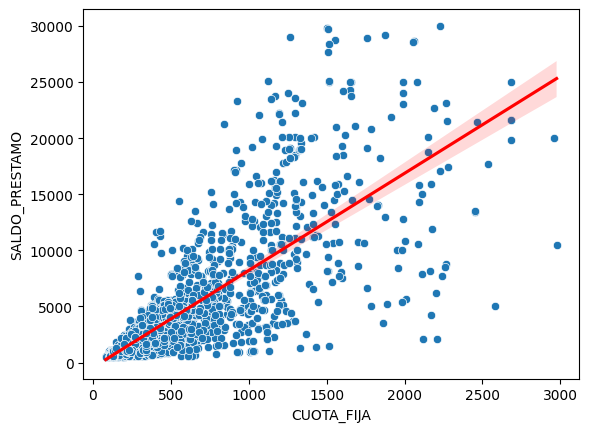

In [88]:
tax_filt = n_data3.loc[(n_data3['CUOTA_FIJA'] <= 3000) &
                   (n_data3['CUOTA_FIJA'] >= 20) &
                   (n_data3['SALDO_PRESTAMO'] >= 500) &
                   (n_data3['SALDO_PRESTAMO'] <= 30000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='SALDO_PRESTAMO');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='SALDO_PRESTAMO', ax=ax, color="red",scatter=False)

### CUOTAS FALTANTES VIGENTES VS SALDO PRESTAMO

In [89]:
n_data3['CUO_FALTANTES_VIGENTES'].corr(n_data3['SALDO_PRESTAMO'])

0.6442728197310716

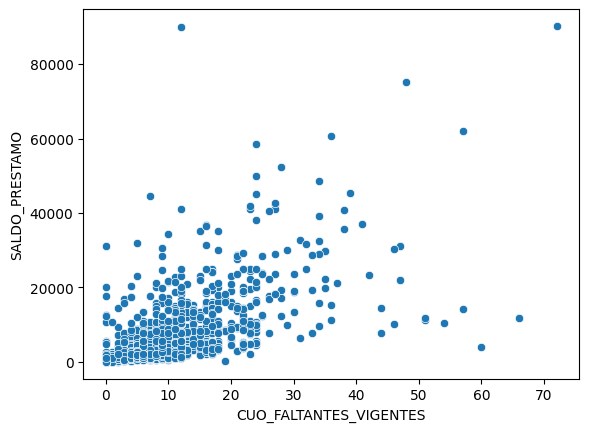

In [145]:
ax = sns.scatterplot(data=n_data3, x='CUO_FALTANTES_VIGENTES', y='SALDO_PRESTAMO')

coef = n_data3['CUO_FALTANTES_VIGENTES'].corr(n_data3['SALDO_PRESTAMO'])


<Axes: xlabel='CUOTA_FIJA', ylabel='CUO_FALTANTES_VIGENTES'>

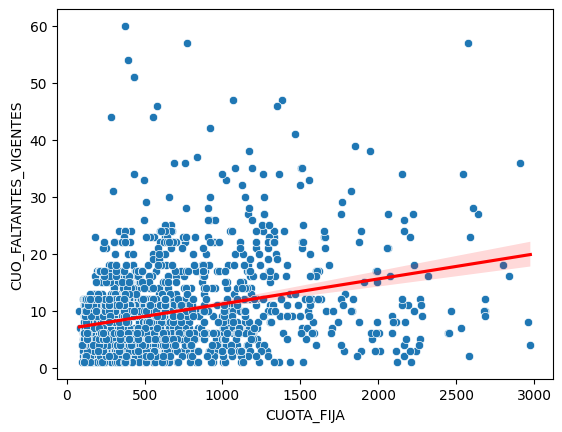

In [91]:
tax_filt = n_data3.loc[(n_data3['CUOTA_FIJA'] <= 3000) &
                   (n_data3['CUOTA_FIJA'] >= 20) &
                   (n_data3['CUO_FALTANTES_VIGENTES'] >= 1) &
                   (n_data3['CUO_FALTANTES_VIGENTES'] <= 60), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='CUOTA_FIJA', y='CUO_FALTANTES_VIGENTES');
sns.regplot(data=tax_filt, x='CUOTA_FIJA', y='CUO_FALTANTES_VIGENTES', ax=ax, color="red",scatter=False)

### MONTO_PRESTADO VS SALDO_PRESTAMO

In [92]:
n_data3.MONTO_PRESTAMO.corr(n_data3.SALDO_PRESTAMO)

0.8441255069256164

In [93]:
# sns.relplot(data=data,height=14)

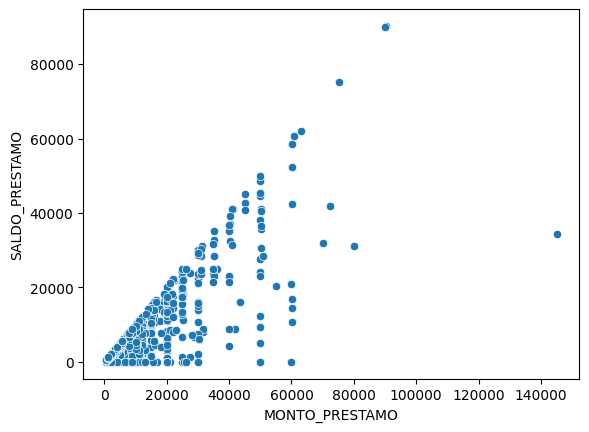

In [94]:
ax = sns.scatterplot(data=n_data3, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO')

coef = n_data3['MONTO_PRESTAMO'].corr(n_data3['SALDO_PRESTAMO'])

<Axes: xlabel='MONTO_PRESTAMO', ylabel='SALDO_PRESTAMO'>

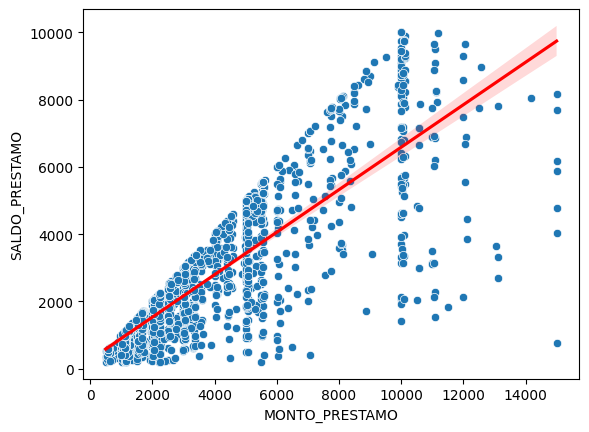

In [95]:
tax_filt = n_data3.loc[(n_data3['MONTO_PRESTAMO'] <= 15000) &
                   (n_data3['MONTO_PRESTAMO'] >= 500) &
                   (n_data3['SALDO_PRESTAMO'] >= 200) &
                   (n_data3['SALDO_PRESTAMO'] <= 10000), :]

# Y dibujar gráfico de dispersión
ax = sns.scatterplot(data=tax_filt, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO');
sns.regplot(data=tax_filt, x='MONTO_PRESTAMO', y='SALDO_PRESTAMO', ax=ax, color="red",scatter=False)

# ANALISIS BIVARIADO CATEGORICO X NUMERICO

In [96]:
data.drop(['SOCIO','CUENTA','TIPO_SOCIO','MONEDA','PAGARE','DIAS'],axis=1, inplace= True)

In [97]:
data

AGENCIA             PRODUCTO FEC_ULT_PAGO  TEA_INTERES  CUOTA_FIJA  \
0           1            MAS VELOZ   2021-11-10        69.39      121.22   
1           1      CREDITO DIGITAL   2021-10-31       101.22      426.95   
2           3    RAPIDIN INVERSION   2024-04-24        45.93      484.19   
3           3        SEMANAL MICRO   2024-04-26       100.08      146.11   
4           3     PAGA DIARIO (CT)   2024-04-20       125.22       19.32   
...       ...                  ...          ...          ...         ...   
9729        1             URGENTES   2018-02-08        42.58       38.65   
9730        1             URGENTES   2022-09-02        42.58      107.95   
9731        1              CASTIGO   2024-04-30        39.29        0.00   
9732        1  NEGOCIO FIJO GRUPAL   2022-01-31        79.56      200.39   
9733        1        MAS INCLUSIVO   2024-03-27       340.87       44.50   

     NOM_FRECUENCIA  EDAD ESTADO_CIVIL SEXO TIPO_VIVIENDA      OTORGA  \
0             MESES    31  Soltero (a)    M      FAMILIAR  2021-05-31   
1           SEMANAS    24  Soltero (a)    F      FAMILIAR  2021-08-26   
2           SEMANAS    32  Soltero (a)    F      FAMILIAR  2023-12-05   
3           SEMANAS    49  Soltero (a)    F        PROPIA  2024-02-05   
4             DIAS     50  Soltero (a)    F     ALQUILADA  2024-03-09   
...             ...   ...          ...  ...           ...         ...   
9729          MESES    50  Soltero (a)    F        PROPIA  2016-12-16   
9730          MESES    41  Soltero (a)    M        PROPIA  2017-01-31   
9731          MESES    48  Soltero (a)    F        PROPIA  2023-12-31   
9732          MESES    51  Soltero (a)    F        PROPIA  2018-02-20   
9733          DIAS     41  Soltero (a)    M      FAMILIAR  2024-03-14   

     RIESGO_INDIVIDUAL  NCUO_ATRASADAS  CUO_FALTANTES_VIGENTES  \
0              PERDIDA               6                       6   
1              PERDIDA               3                       3   
2               NORMAL               0                       3   
3                  CPP               1                       1   
4               NORMAL               0                       0   
...                ...             ...                     ...   
9729            NORMAL               0                      60   
9730            NORMAL               0                      60   
9731           PERDIDA               3                       3   
9732           PERDIDA              12                      12   
9733               CPP              29                      29   

      NDIAS_ATRASADOS  MONTO_PRESTAMO  SALDO_PRESTAMO  NRO_REPRO  \
0                 852         1100.00          623.95        NaN   
1                 964         1650.00         1156.90        NaN   
2                   0        11000.00         1017.69        NaN   
3                  29         1100.00          142.18        NaN   
4                   0          550.00            0.00        NaN   
...               ...             ...             ...        ...   
9729                0         5150.00         1714.87        3.0   
9730                0        10300.00         5875.23        3.0   
9731             2220          921.46          421.46        0.0   
9732             1156         4000.00         2319.18        1.0   
9733               13         1210.00         1141.17        NaN   

                          ANA_ORIGEN                    ANA_ACTUAL  \
0     BUSTAMANTE BACA, CESAR EDUARDO     PEÑA CANO, MENLY AMBERGAR   
1            GARCIA LINARES, RODRIGO          ZAGA BERRERAS, DANNY   
2             SALAS LECHUGA, MARIELA        SALAS LECHUGA, MARIELA   
3             SALAS LECHUGA, MARIELA        SALAS LECHUGA, MARIELA   
4          CARHUAS HUANQUI, FERNANDO     CARHUAS HUANQUI, FERNANDO   
...                              ...                           ...   
9729           CAMPANA AZURIN, DAYSI  AGUILAR SANCHEZ, MARVIN JOEL   
9730          CHAUCA MENDOZA, YUDITH  FERNANDE

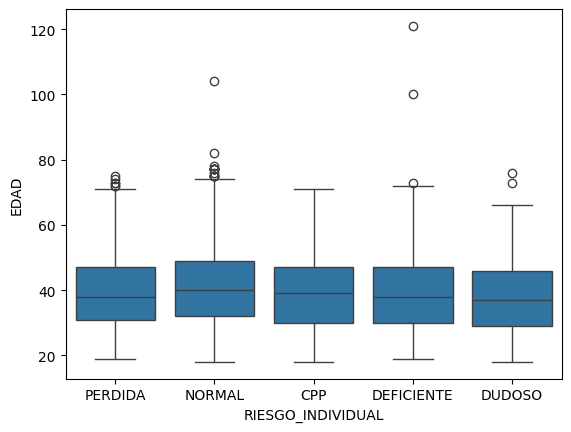

In [98]:
ax = sns.boxplot(data=data, x='RIESGO_INDIVIDUAL', y='EDAD')

In [99]:
data.nunique()

AGENCIA                      7
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [100]:
#ax = sns.boxplot(data=data.query('NCUO_ATRASADAS <= 30'), x='NCUO_ATRASADAS', y='EDAD')

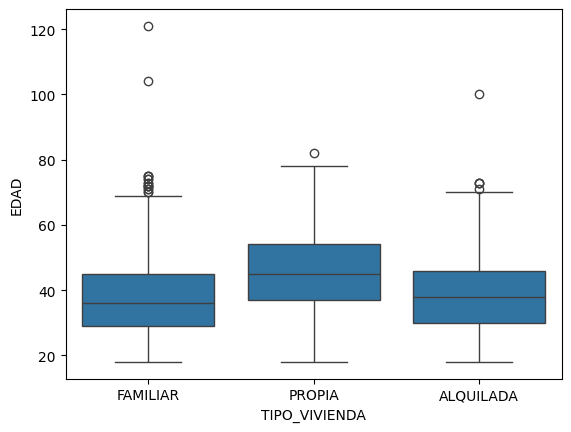

In [101]:
ax = sns.boxplot(data=data, x='TIPO_VIVIENDA', y='EDAD')

Podemos observar observaciones acerca de la distribucion de socios por el tipo de vivienda
- Los socios con vivienda familiar y alquilada, Son socios que tienen una edad menor que los que poseen una vivienda propia
- En la distribucion de edad de socios por tipo de vivienda fluctua entre los 25 y los 70


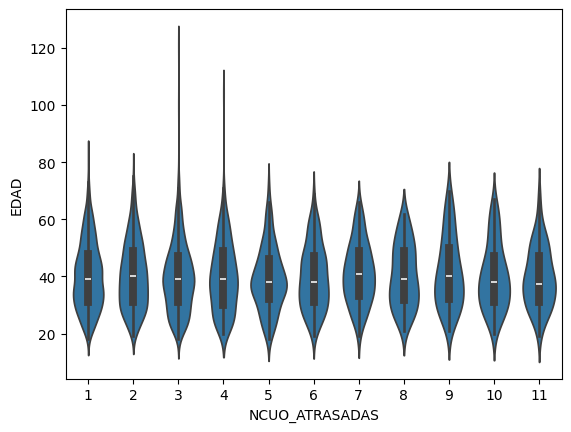

In [102]:
ax = sns.violinplot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 12'), x='NCUO_ATRASADAS', y='EDAD')


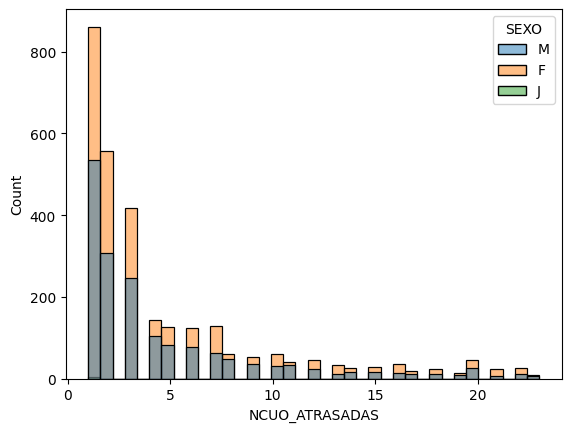

In [103]:
ax = sns.histplot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO')

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_24828\2369820446.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO', kind='kde')


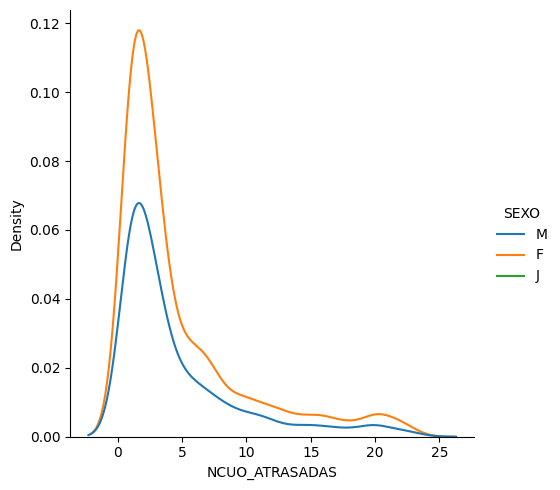

In [104]:
ax = sns.displot(data=data.query('NCUO_ATRASADAS > 0 and NCUO_ATRASADAS < 24'), x='NCUO_ATRASADAS', hue='SEXO', kind='kde')

## ANALISIS DE DATOS

In [105]:
data.nunique()

AGENCIA                      7
PRODUCTO                    38
FEC_ULT_PAGO               411
TEA_INTERES                958
CUOTA_FIJA                7955
NOM_FRECUENCIA               4
EDAD                        65
ESTADO_CIVIL                 6
SEXO                         3
TIPO_VIVIENDA                3
OTORGA                    1223
RIESGO_INDIVIDUAL            5
NCUO_ATRASADAS             111
CUO_FALTANTES_VIGENTES     198
NDIAS_ATRASADOS            547
MONTO_PRESTAMO            1244
SALDO_PRESTAMO            8176
NRO_REPRO                   13
ANA_ORIGEN                 168
ANA_ACTUAL                  83
PROFESION                   80
OCUPACION                 2900
ACTIVIDAD_ECO               37
dtype: int64

In [106]:
data.loc[data['PROFESION'].isin(['No Especificada', 'No Tiene', 'Su Casa']), 'PROFESION'] = 'GENERAL'
data.loc[data['PROFESION'].isin(['Cosmetologo, Peluquero y Barbero', 'Cosmetologa', 'Especialista en Tratamiento de Belleza']), 'PROFESION'] = 'Estilista'
data.loc[data['PROFESION'].isin(['Docente','Contador','Enfermero','Farmaceutico','Empleado de oficina','Ingeniero Civil','Ingeniero de Sistemas','Secretaria','Odontologo','Nutricionista','Ingeniero Mecánico Electrico','Analista de Sistema y Computacion','Arquitecto','Antropologo, Arqueologo y Etnologo','Ing. Industrial','Psicologo','Agronomo','Medico y Cirujano','Topógrafo','Ingeniero Quimico','Obstetriz','Agrimensor y Topografo','Entrenador Deportivo','Director de Empresas','Relacionista Publico e Industrial','Sociologo','Bacteriologo, Farmacologo']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Biologo', 'Geografo','Abogado','Ingeniero Agronomo','Deportista Profesional y Atleta']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Economista']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Administrador de Empresas (Profesional)', 'Locutor de Radio, Tv',  'Fotografo y Operador de Camara, Cine TV']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Veterinario']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Policia']), 'PROFESION'] ='profesional'
data.loc[data['PROFESION'].isin(['Biologo', 'Geografo','Abogado','Ingeniero Agronomo','Deportista Profesional y Atleta']), 'PROFESION'] = 'profesional'
# data.loc[data['RIESGO'].isin(['CPP', 'DEFICIENTE', 'DUDOSO']), 'RIESGO'] = 'PERDIDA'
data.loc[data['PROFESION'].isin(['Chofer', 'Conductor de Vehiculos de Motor','Albañil'
,'Carpintero', 'Supervisor','Tapicero','Electricista (Tecnico)','soldador','Sastre','Mecanico de Vehiculos de Motor','Vigilante']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['Técnico en Computacion', 'Agricultor','Controlador'
,'Recepcionista', 'Modista','Laboratorista(técnico)','Gasfitero','Radio Tecnico','Sastre','Mecanico de Vehiculos de Motor','Vigilante']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['Estilista', 'Artesano Textil ','Musico'
,'Pintor', 'Escultor','Actor, Artista y Director Espectaculos','Decorador, Dibujante, Public. y Diseñado','Coreografo y Bailarines','Autor Literario, Escritor y Critico ','Obrero artesanal']), 'PROFESION'] = 'artista'
data.loc[data['PROFESION'].isin(['Autor Literario, Escritor y Critico']), 'PROFESION'] = 'artista'
data.loc[data['PROFESION'].isin(['Artesano Textil', 'Artesano de Cuero','Supervisor','Tapicero']), 'PROFESION'] = 'oficio'
data.loc[data['PROFESION'].isin(['GENERAL', 'Estudiante']), 'PROFESION'] = 'general'
data.loc[data['PROFESION'].isin(['Periodista']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['Mecanico Motores Aviones y Naves Marinas','Ingenierio de Minas', 'Modelo']), 'PROFESION'] = 'profesional'
data.loc[data['PROFESION'].isin(['mecanico', 'obrero']), 'PROFESION'] = 'oficio'

In [107]:
data.PROFESION.value_counts()

PROFESION
Comerciante    4932
general        2530
oficio         1239
profesional     890
artista         143
Name: count, dtype: int64

<Axes: xlabel='PROFESION', ylabel='EDAD'>

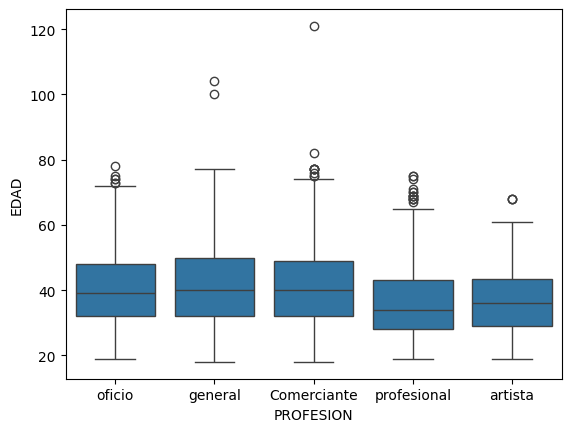

In [108]:
sns.boxplot(data = data, x = 'PROFESION', y='EDAD')

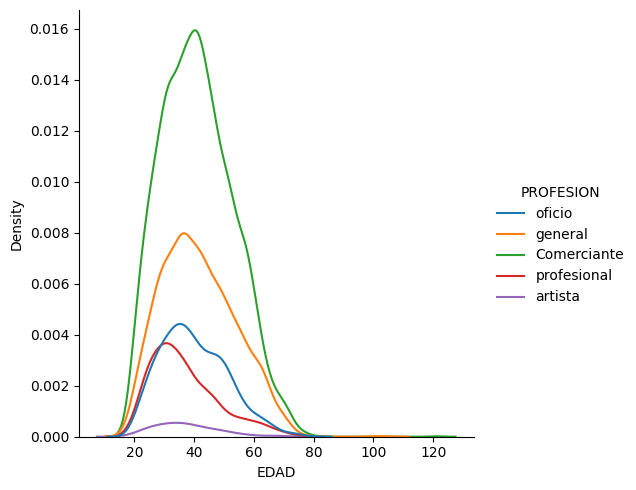

In [109]:
ax = sns.displot(data=data, x='EDAD', hue='PROFESION', kind='kde')

<Axes: xlabel='EDAD', ylabel='Probability'>

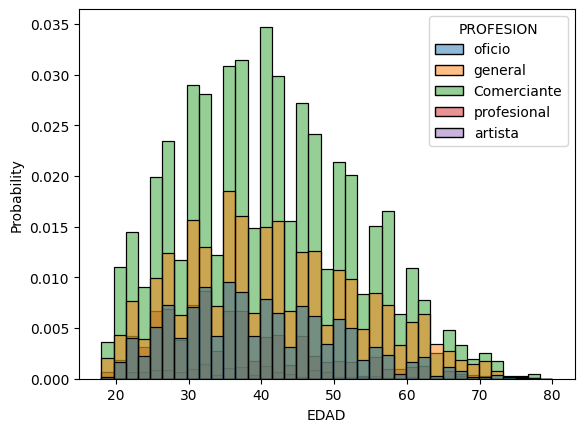

In [110]:
sns.histplot(data=data, x='EDAD', hue ='PROFESION', stat='probability', binrange=(18,80))

In [111]:
data.OCUPACION.value_counts()

OCUPACION
COMERCIANTE                                           1481
TAXISTA                                                226
VENTA DE ABARROTES                                     195
TIENDA DE ABARROTES                                    165
RESTAURANTE                                            165
                                                      ... 
VENTA DE COMIDAS(DESAYUNOS)                              1
COMERCIANTE DE CARNE EN EL MERCADO DE MAYORISTAS D       1
VENTA DE POLLOS MERCADO DE PRODUCTORES                   1
COMERCIANTE TIENDA DE ABARROTES                          1
FABRICANTE DE ESTANTES DE MELAMINA                       1
Name: count, Length: 2900, dtype: int64

In [112]:
data.ACTIVIDAD_ECO.value_counts()

ACTIVIDAD_ECO
Ambulantes y Puestos de Venta en Mercado    3478
Otros Servicios                             3054
Bodega                                       742
Restaurante, Bares y Cantinas                575
Conductor de Vehiculo                        280
Empleado Sector Privado                      254
Transporte Público de Pasajeros              206
Venta al por Mayor de Abarrotes              105
Empleado Sector Público                      102
Construcción                                 102
Costurera                                     91
Farmacia                                      85
Ferreteria                                    68
Mantenimiento y Reparación de Vehiculos       65
Peluqueria y Tratamiento de Belleza           64
Carpintero                                    54
Artesanos                                     53
Agricultura y Ganaderia                       47
Librería, Joyería y Vta.Art.Deportivos        42
Panaderia                                     32
Educac

In [113]:
# pd.set_option('display.max_rows', None)
data.loc[data['PROFESION']== 'general'].OCUPACION.value_counts()


OCUPACION
COMERCIANTE              297
COMERCIANTE              105
                          76
RESTAURANTE               48
VENTA DE ABARROTES        46
                        ... 
COMERCIANRE                1
INTERNET                   1
AGRICULTOR                 1
RENVADORA DE CALZADOS      1
ABOGADO                    1
Name: count, Length: 1020, dtype: int64

In [114]:
pd.set_option('display.max_rows', 100)

In [115]:
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].isin(["ABOGADO", "ADMINISTRADOR", "ADMINISTRADORA", "AGENTE DE VIGILANCIA", "ANALISTA", "ANALISTA DE CREDITOS", "ANALISTA DE SISTEMAS", "ARQUITECTO", "ASISTENTE ADMINISTRATIVO", "ASISTENTE DENTAL", "ASESOR COMERCIAL", "ASESOR DE CREDITOS", "ASESOR DE NEGOCIOS", "ASESOR DE VENTAS", "ASESOR FINANCIERO", "AUDITOR", "AUXILIAR DE ALMACEN", "AUXILIAR DE FISCALIZACION", "AUXILIAR DE JARDIN", "BACHILLER EN INGENIERÍA DE MINAS", "BARMAN", "CHOFER", "COBRADORA", "COCINERO", "CONTADOR", "CONTADORA", "COORDINADOR", "COSMETOLOGO", "COSMETOLOGA", "DECORADOR", "DECORADORA", "DEPENDIENTE FORMAL", "DISEÑADOR DE GRAFICOS", "DISEÑADOR PUBLICITARIO", "DOCENTE", "ENFERMERA", "EJECUTIVO DE VENTAS", "EMPLEADO", "EMPLEADA", "EMPLEADOR", "EMPRESARIO", "FISIOTERAPEUTA", "FOTOGRAFO PROFESIONAL", "GERENTE", "GESTOR DE VENTAS", "GESTOR TECNICO", "GUIA DE TURISMO", "GUIA OFICIAL", "GUIA OFICIAL DE TURISMO", "INGENIERO METALURGICO", "JEFA DE HOGAR", "LABORATORISTA", "LICENCIADO EN TURISMO", "MAESTRO DE OBRA", "MEDICO", "MERCADERISTA", "MILITAR", "MINISTRA", "MOZA", "NIÑERA", "OFTALMOLOGA", "OPTOMETRISTA", "OPERADOR DE MAQUINARIA", "OPERARIO", "OPERARIO DE ALMACEN", "OPERARIO DE LIMPIEZA DE VEHICULOS", "OPTIMOMETRA", "PARAMÉDICO", "PERSONAL TRAINING", "PISICOLOGO", "POLICIA", "POLICIA MUNICIPAL", "PREVEN", "PREVENTISTA", "PROFESORA", "PROMOTOR DE VENTAS", "PROMOTORA DE VENTAS", "PROVEDORA", "PSICÓLOGA", "RECEPCIONISTA", "REPRESENTANTE DE VENTAS", "RESIDENTE DE OBRA", "SASTRE", "SUPERVISOR", "SUPERVISOR COMERCIAL", "SUPERVISOR DE OBRAS", "SUPERVISOR DE TIENDA", "TAXISTA", "TECNICO DE CELULARES", "TECNICO DE MANTENIMIENTO", "TECNICO ELECTRICISTA", "TECNICO EN COMPUTACION", "TECNICO EN ENFERMERIA", "TECNICO EN FARMACIA", "TECNÓLOGA EN CONTABILIDAD", "TRABAJADORA", "TRABAJADORA SOCIAL", "TRABAJADOR ADMINISTRATIVO", "TRABAJADOR DEPENDIENTE", "TRABAJADOR DEPENDIENTE INFORMAL", "TRABAJADOR MUNICIPAL", "TRABAJADOR DEL GOBIERNO REGIONAL", "TRAINER", "TRIPULANTE DE SERVICIO A BORDO", "VETERINARIO"])), 'PROFESION'] = 'profesional'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('COMERCI')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('VENTA')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (data['OCUPACION'].str.startswith('VENDE')), 'PROFESION'] = 'Comerciante'
data.loc[(data['PROFESION'] == 'general') & (~data['OCUPACION'].isnull()), 'PROFESION'] = 'oficio'

In [116]:
data.PROFESION.value_counts()

PROFESION
Comerciante    5996
oficio         2423
profesional    1073
artista         143
general          99
Name: count, dtype: int64

In [117]:
plt.figure(figsize=(20, 8)) 
sns.histplot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', stat='density', binrange=(18, 80), multiple="stack", legend=False, bins=20)
plt.show()


In [118]:
ax = sns.displot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', kind='kde')

C:\Users\LAPTOP\AppData\Local\Temp\ipykernel_24828\3306689238.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  ax = sns.displot(data=data, x='EDAD', hue='ACTIVIDAD_ECO', kind='kde')


In [1]:
data.info()

NameError: name 'data' is not defined